In [1]:
#import statements
#!pip install sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,balanced_accuracy_score
from statistics import mean,variance,mode,median_low
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.utils.random import sample_without_replacement

In [6]:
#Please get the .data file @: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
path = "/content/drive/MyDrive/german.data"
df = pd.DataFrame(columns=["checking account","duration","credit history","purpose","credit amount","savings account","present employment since","installment rate","personal status/sex","other debtors","present residence since","property","age","other installment plans","housing","existing credits","job","people to provide","telephone","foreign worker","class"])
data = open(path, "r")
c=0
for line in data.readlines():
  df.loc[c]=line.split()
  c+=1
print(df)
###########################################################################################

#First get an overview of the dataset
#get dataset @: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
#COLUMNS: from dataset description
#STATUS OF CHECKING ACCOUNT: A11:[,0), A12:[0,200), A13:[200,], A14:no checking account
#DURATION in months: numerical
#CREDIT HISTORY: A30: no credits taken/all credits paid back duly,
#                A31: all credits at this bank paid back duly
#                A32: existing credits paid back duly till now
#                A33: delay in paying off in the past
#                A34: critical account/other credits existing (not at this bank)
#PURPOSE: A40: car (new)
#         A41: car (used)
#         A42: furniture/equipment
#         A43: radio/television
#         A44: domestic appliances
#         A45: repairs
#         A46: education
#         A47: (vacation - does not exist?)
#         A48: retraining
#         A49: business
#         A410: others
#CREDIT AMOUNT: numerical
#SAVINGS ACCOUNT/BONDS: A61: [,100), A62:[100,500),A63:[500,1000),A64:[1000,),A65:unknown/no savings account
#PRESENT EMPLOYMENT SINCE (in years): A71: unemployed, A72:[,1), A73:[1,4), A74:[4,7), A75:[7,)
#INSTALLMENT RATE in percentage of disposable income: numerical
#PERSONAL STATUS/SEX: A91: male&divorce/separated
#                     A92: female&divorced/separated/married
#                     A93: male&single
#                     A94: male&married/widowed
#                     A95: female&single
#OTHER DEBTORS/GUARANTORS: A101: none
#                          A102: co-applicant
#                          A103: guarantor
#PRESENT RESIDENCE SINCE: numerical
#PROPERTY: A121: real estate
#          A122: if not A121: building society savings agreement/life insurance
#          A123: if no A121/A122: car or other, not in attribute 6
#          A124: unknown/no property
#AGE: numerical
#OTHER INSTALLMENT PLANS: A141: bank
#                         A142: stores
#                         A143: none
#HOUSING: A151: rent
#         A152: own
#         A153: for free
#NUMBER OF EXISTING CREDITS AT THIS BANK: numerical
#JOB: A171: unemployed/unskilled - non-resident
#     A172: unskilled - resident
#     A173: skilled employed/official
#     A174: management/self-employed/highly qualified employee/officer
#NUMBER OF PEOPLE BEING LIABLE TO PROVIDE MAINTENANCE FOR: numerical
#TELEPHONE: A191: none
#           A192: yes, registered under the customers name
#FOREIGN WORKER: A201: yes
#                A202: no
###################################################################

#Turn all numerical data numerical
df['duration']=df['duration'].astype(int)
df['credit amount']=df['credit amount'].astype(int)
df['installment rate']=df['installment rate'].astype(int)
df['present residence since']=df['present residence since'].astype(int)
df['age']=df['age'].astype(int)
df['existing credits']=df['existing credits'].astype(int)
df['people to provide']=df['people to provide'].astype(int)
df['class']=df['class'].astype(int)

#Analyse the dataset as it is
print("---------------------------------")
print(df.describe())
for col in df.columns:
  print(col,":")
  if df[col].dtype=='int64':
    #do numeric calculation
    print("Mean: ",df[col].mean())
    print("Variance: ",variance(df[col]))
    print("Standard deviation: ",df[col].std())
    print("Median: ",df[col].median())
  print("Mode: ",df[col].mode()[0])
  print(df[col].value_counts()[:3])
  print()
#Bin age feature to create demographic subgroups
bin_df = df.copy(deep=True)
#AGE: young: <=24, old>24
bin_df['age']=['young' if bin_df['age'][i]<=25 else 'old' for i in range(len(bin_df))]
bin_df['age']=bin_df['age'].astype(object)

#Drop all features that are not numeric and not ordinal
bin_df.drop('purpose',axis=1,inplace=True)
bin_df.drop('other debtors',axis=1, inplace=True)
bin_df.drop('other installment plans',axis=1,inplace=True)
bin_df.drop('telephone',axis=1,inplace=True)
bin_df.drop('foreign worker',axis=1,inplace=True)

#TASK 2
#Analyse the subgroups of the feature: age
sub_df1 = bin_df[bin_df['age']=='young']
sub_df2 = bin_df[bin_df['age']=='old']
print(len(sub_df1),len(sub_df2))
for col in bin_df:
  print(col,":")
  if bin_df[col].dtype=='int64':
    #do numeric calculation
    print("Mean: ",bin_df[col].mean(),sub_df1[col].mean(),sub_df2[col].mean())
    print("Variance: ",variance(bin_df[col]),variance(sub_df1[col]),variance(sub_df2[col]))
    print("Standard deviation: ",bin_df[col].std(),sub_df1[col].std(),sub_df2[col].std())
    print("Median: ",bin_df[col].median(),sub_df1[col].median(),sub_df2[col].median())
  print("Mode: ",bin_df[col].mode()[0],sub_df1[col].mode()[0],sub_df2[col].mode()[0])
  print(bin_df[col].value_counts()[:5])
  print(sub_df1[col].value_counts()[:5])
  print(sub_df2[col].value_counts()[:5])
  print()

    checking account duration credit history purpose credit amount  \
0                A11        6            A34     A43          1169   
1                A12       48            A32     A43          5951   
2                A14       12            A34     A46          2096   
3                A11       42            A32     A42          7882   
4                A11       24            A33     A40          4870   
..               ...      ...            ...     ...           ...   
995              A14       12            A32     A42          1736   
996              A11       30            A32     A41          3857   
997              A14       12            A32     A43           804   
998              A11       45            A32     A43          1845   
999              A12       45            A34     A41          4576   

    savings account present employment since installment rate  \
0               A65                      A75                4   
1               A61          

In [3]:
#Task 3 Conventional implementation
#Check there are no missing values
print(bin_df.isna().sum())

#Drop the class column and create the target column
y = bin_df['class'].copy()

#Divide columns between data types
numerical_data=[]
categorical_data=[]
for col in bin_df.columns:
  if col=='class':
    continue
  if bin_df[col].dtype=='int64':
    numerical_data.append(col)
  else:
    categorical_data.append(col)
mappings_dict = {}
label_encoder = LabelEncoder()

#Encode categorical data type
for col in categorical_data:
    bin_df[col] = label_encoder.fit_transform(bin_df[col])
    mappings_dict[col]=dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(mappings_dict)
df=bin_df.copy()
#Split into test and training set
X_train, X_test, y_train, y_test = train_test_split(bin_df.drop('class',axis=1), y, test_size=0.333,random_state=0,stratify=y,shuffle=True)
#Scale the data
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
])
cat_pipeline = Pipeline(steps = [
        ('std_scaler', StandardScaler())
])
full_pipeline = ColumnTransformer([('cat',cat_pipeline,categorical_data),('num',num_pipeline,numerical_data)],remainder='passthrough')
X_train = full_pipeline.fit_transform(X_train)
X_test_orig = X_test.copy()
X_test = full_pipeline.transform(X_test)


checking account            0
duration                    0
credit history              0
credit amount               0
savings account             0
present employment since    0
installment rate            0
personal status/sex         0
present residence since     0
property                    0
age                         0
housing                     0
existing credits            0
job                         0
people to provide           0
class                       0
dtype: int64
{'checking account': {0: 'A11', 1: 'A12', 2: 'A13', 3: 'A14'}, 'duration': {0: 4, 1: 5, 2: 6, 3: 7, 4: 8, 5: 9, 6: 10, 7: 11, 8: 12, 9: 13, 10: 14, 11: 15, 12: 16, 13: 18, 14: 20, 15: 21, 16: 22, 17: 24, 18: 26, 19: 27, 20: 28, 21: 30, 22: 33, 23: 36, 24: 39, 25: 40, 26: 42, 27: 45, 28: 47, 29: 48, 30: 54, 31: 60, 32: 72}, 'credit history': {0: 'A30', 1: 'A31', 2: 'A32', 3: 'A33', 4: 'A34'}, 'credit amount': {0: 250, 1: 276, 2: 338, 3: 339, 4: 343, 5: 362, 6: 368, 7: 385, 8: 392, 9: 409, 10: 426, 11: 4

In [7]:
#splitting dataset into majority and minority group function
def min_maj(X,encoded):
  if encoded==True:
    min = X[X['age']==1].copy()
    maj = X[X['age']==0].copy()
  else:
    min= X[X['age']=='young'].copy()
    maj = X[X['age']=='old'].copy()
  full_pipeline.fit(X)
  min = full_pipeline.transform(min)
  maj = full_pipeline.transform(maj)
  return min,maj
#measures of bias functions
def zemel_fairness(X_min,X_maj,predictor):
  pos_min=(list(predictor.predict(X_min)).count(1))/(len(X_min))#positive outcome rate minority group
  print((list(predictor.predict(X_min)).count(1)),(len(X_min)))
  pos_maj=(list(predictor.predict(X_maj)).count(1))/(len(X_maj))#positive outcome rate majority group
  print((list(predictor.predict(X_maj)).count(1)),(len(X_maj)))
  return pos_maj-pos_min
def disparate_impact(X_min,X_maj,predictor):
  pos_min=(list(predictor.predict(X_min)).count(1))/(len(X_min))#positive outcome rate minority group
  pos_maj=(list(predictor.predict(X_maj)).count(1))/(len(X_maj))#positive outcome rate majority group
  if pos_maj==0:
    print(list(predictor.predict(X_maj)))
  return pos_min/pos_maj

In [6]:
#Implement Machine Learning algorithm: SVC
svc = LinearSVC(random_state=0,penalty='l2', loss='hinge',class_weight='balanced')
#hyper-parameter tuning
Cs = [0.01,0.1, 1, 10]
svc_grid = {'C':Cs}
svc_grid_search = GridSearchCV(svc, svc_grid, refit = True, verbose = 3, n_jobs=-1,cv=5)
svc_grid_search.fit(X_train,y_train)
print("svc best score:", svc_grid_search.best_score_)
print("svc best estimator:",svc_grid_search.best_estimator_)
svc = svc_grid_search.best_estimator_
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
svc_score=svc.score(X_test,y_test)
print("model accuracy: %.5f" % svc_score)
print("balanced accuracy rate: %.5f" % balanced_accuracy_score(y_test, y_pred))
X_test_young,X_test_old = min_maj(X_test_orig,True)
print("Zemel fairness: ",1-zemel_fairness(X_test_young,X_test_old,svc))
print("Disparate Impact: ",disparate_impact(X_test_young,X_test_old,svc))
#print(df)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
svc best score: 0.6777017169790147
svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.90      0.69      0.78       233
           2       0.53      0.83      0.65       100

    accuracy                           0.73       333
   macro avg       0.72      0.76      0.71       333
weighted avg       0.79      0.73      0.74       333

model accuracy: 0.72973
balanced accuracy rate: 0.75835
25 73
161 260
Zemel fairness:  0.7232349841938883
Disparate Impact:  0.5530502850336084


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished


In [8]:
#Subsample a new testing dataset in an unbiased way and representative of the task, for example, you
#may wish to ensure gender and age diversity. Retrain your model and see how it generalises to these
#new testing conditions. Compare your findings with the results in 3 and explain your approach.

#SUBSAMPLING METHOD:
#Ensure that each age group and gender is represented the same amount
#First see how many of each group is in the dataset
print(sub_df1['personal status/sex'].value_counts()) #Check gender balance in young age group
print(sub_df2['personal status/sex'].value_counts()) #Check gender balance in old age group
sub_df1f = sub_df1[sub_df1['personal status/sex']=='A92']
print("Number of females in young age group: ",len(sub_df1f))
sub_df1m = sub_df1[((sub_df1['personal status/sex']=='A91') | (sub_df1['personal status/sex']=='A93') | (sub_df1['personal status/sex']=='A94'))]
print("Number of males in young age group: ",len(sub_df1m))
sub_df2f = sub_df2[sub_df2['personal status/sex']=='A92']
print("Number of females in old age group: ",len(sub_df2f))
sub_df2m = sub_df2[((sub_df2['personal status/sex']=='A91') | (sub_df2['personal status/sex']=='A93') | (sub_df2['personal status/sex']=='A94'))]
print("Number of males in old age group: ",len(sub_df2m))

#Take 85 instances out of every sub_df
#because there are only 85 who are young and male
sample_indices1f = sample_without_replacement(n_population=105,n_samples=85,random_state=0)
sample_indices1m = sample_without_replacement(n_population=85,n_samples=85,random_state=0)
sample_indices2f = sample_without_replacement(n_population=205,n_samples=85,random_state=0)
sample_indices2m = sample_without_replacement(n_population=605,n_samples=85,random_state=0)
stratas = [sub_df1f,sub_df1m,sub_df2f,sub_df2m]
sample_indices = [sample_indices1f,sample_indices1m,sample_indices2f,sample_indices2m]
index_list = []
sub_y=[]
for s in range(len(stratas)):
  for i in range(len(stratas[s])):
    if i in sample_indices[s]:
      index_list.append(stratas[s].index[i])
sub_y = y[y.index.isin(index_list)]
strat_df = bin_df[bin_df.index.isin(index_list)]

#Split into test and training set
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(strat_df.drop('class',axis=1), sub_y, test_size=0.3,random_state=0,stratify=sub_y,shuffle=True)
X_train_sub = full_pipeline.fit_transform(X_train_sub)
X_test_sub_orig = X_test_sub.copy()
X_test_sub = full_pipeline.transform(X_test_sub)
#Implement Machine Learning algorithm: SVC
svc_sub = LinearSVC(random_state=0,penalty='l2', loss='hinge',class_weight='balanced')
#hyperparameter tuning
svc_sub_grid_search = GridSearchCV(svc_sub, svc_grid, refit = True, verbose = 3, n_jobs=-1,cv=5)
svc_sub_grid_search.fit(X_train_sub,y_train_sub)
print("svc best estimator:",svc_sub_grid_search.best_estimator_)
svc_sub = svc_sub_grid_search.best_estimator_
#prediction
y_pred_sub = svc_sub.predict(X_test_sub)
print(classification_report(y_test_sub, y_pred_sub))
svc_sub_score=svc_sub.score(X_test_sub,y_test_sub)
print("model accuracy: %.5f" % svc_sub_score)
print("balanced accuracy rate: %.5f" % balanced_accuracy_score(y_test_sub, y_pred_sub))
X_test_sub_young,X_test_sub_old = min_maj(X_test_sub_orig,True)
print("Zemel fairness: ",1-zemel_fairness(X_test_sub_young,X_test_sub_old,svc_sub))
print("Disparate Impact: ",disparate_impact(X_test_sub_young,X_test_sub_old,svc_sub))

A92    105
A93     56
A94     27
A91      2
Name: personal status/sex, dtype: int64
A93    492
A92    205
A94     65
A91     48
Name: personal status/sex, dtype: int64
Number of females in young age group:  105
Number of males in young age group:  85
Number of females in old age group:  205
Number of males in old age group:  605


ValueError: could not convert string to float: 'A14'

In [8]:
#Implement the fair ML solution used in your project
#Repair toll from Feldman et al.
def unique_value_data_structures(df):
  sorted_lists = {}
  index_lookups = {}
  for col in df.columns:
    lst = list(df[col].unique())
    sorted_list = sorted(lst)
    sorted_lists[col]=sorted_list
    index_lookup = {}
    for i in range(len(sorted_list)):
      index_lookup[sorted_list[i]]=i
    index_lookups[col]=index_lookup
  return sorted_lists,index_lookups


def repair(requested_repair_type,df,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,lamb,new_df):
  print(lamb)
  quantile_unit = 1.0/number_of_quantiles
  for col in df.columns:
    if col=='age' or col=='personal status/sex':# or col=='class':
      continue
    group_offsets={}
    for i in range(len(all_stratified_combinations)):#for each subgroup sort by the column that is being repaired
      group_offsets[i]=0
      all_stratified_combinations[i].sort_values(by=col,inplace=True)
    for q in range(number_of_quantiles):#for each quantile get the median
      median_values_at_quantile = []
      entries_at_quantile = []
      values_at_quantile =[]
      for i in range(len(all_stratified_combinations)): #for each subgroup get the median for the quantile
        group=all_stratified_combinations[i]
        offset = group_offsets[i]
        number_of_entries = int(np.floor(len(group)*quantile_unit))
        if number_of_entries<1:
          number_of_entries+=1
        if offset+number_of_entries<(quantile_unit*len(group)*(q)):
          number_of_entries+=1
        group_offsets[i]+=number_of_entries
        IDs = (group.iloc[offset:(offset+number_of_entries)]).index
        #select the IDs/indices of the instances to belong in the quantile
        entries_at_quantile.extend(list(IDs))
        values = list(group.loc[pd.Index(IDs),col])
        median_values_at_quantile.append(median_low(values))
      #take the median from the median for each group of this quantile 
      target_value = median_low(median_values_at_quantile)
      position_of_target = index_lookups[col][target_value]
      for i in range(len(entries_at_quantile)):#repair each value
        ID = entries_at_quantile[i]
        value = int(df.loc[ID,col])
        #select value from column, in D, where ID = entry ID
        if requested_repair_type=='combinatorial':
          position_of_original_value = index_lookups[col][value]
          distance = position_of_target-position_of_original_value
          distance_to_repair=int(np.round(distance*lamb))
          index_of_repair_value = position_of_original_value+distance_to_repair
          repair_value=sorted_lists[col][index_of_repair_value]
        else:
          repair_value = (1-lamb)*value+lamb*target_value
        #update D',set column=repair_value,where ID=entryID
        new_df.loc[ID,col]=repair_value
  return new_df

df_c = df.copy()
sorted_lists,index_lookups = unique_value_data_structures(df_c)
print(sorted_lists)
print(index_lookups)
print(df_c)
df_young = (df_c[df_c['age']==0]).copy()
df_old = (df_c[df_c['age']==1]).copy()
all_stratified_combinations = [df_young,df_old]
#number of quantiles equal to size of smallest group
number_of_quantiles=min(len(df_young),len(df_old))
new_df10g = df_c.copy()
new_df10g=repair('geo',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,1,new_df10g)


{'checking account': [0, 1, 2, 3], 'duration': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 26, 27, 28, 30, 33, 36, 39, 40, 42, 45, 47, 48, 54, 60, 72], 'credit history': [0, 1, 2, 3, 4], 'credit amount': [250, 276, 338, 339, 343, 362, 368, 385, 392, 409, 426, 428, 433, 448, 454, 458, 484, 518, 522, 571, 585, 590, 601, 609, 618, 625, 626, 629, 639, 640, 652, 654, 660, 662, 666, 672, 674, 682, 683, 684, 685, 691, 697, 700, 701, 707, 708, 709, 717, 719, 727, 730, 731, 741, 745, 750, 753, 754, 759, 760, 763, 766, 776, 781, 783, 790, 795, 797, 802, 804, 806, 836, 841, 846, 860, 866, 874, 882, 884, 886, 888, 894, 900, 902, 907, 909, 915, 918, 926, 929, 930, 931, 932, 936, 937, 939, 947, 950, 951, 958, 959, 960, 975, 976, 983, 996, 999, 1007, 1024, 1028, 1037, 1038, 1042, 1047, 1048, 1049, 1050, 1053, 1055, 1056, 1068, 1076, 1082, 1092, 1098, 1101, 1103, 1107, 1108, 1113, 1123, 1126, 1131, 1136, 1138, 1149, 1154, 1155, 1158, 1163, 1164, 1168, 1169, 1175, 1185, 1188, 119

In [9]:
def reset(df):
  df_c = df.copy()
  df_young = (df_c[df_c['age']==0]).copy()
  df_old = (df_c[df_c['age']==1]).copy()
  all_stratified_combinations = [df_young,df_old]
  number_of_quantiles=min(len(df_young),len(df_old))
  return df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles

In [10]:
#Create all the 22 new dataframes with lambda between 0 and 1 in steps of 0.1 and the two repair methods
#lambda=0
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df0c = df_c.copy()
new_df0c=repair('combinatorial',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0,new_df0c)
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df0g = df_c.copy()
new_df0g=repair('geo',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0,new_df0g)
#lambda=0.1
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df1c = df_c.copy()
new_df1c=repair('combinatorial',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.1,new_df1c)
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df1g = df_c.copy()
new_df1g=repair('geo',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.1,new_df1g)
#lambda=0.2
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df2c = df_c.copy()
new_df2c=repair('combinatorial',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.2,new_df2c)
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df2g = df_c.copy()
new_df2g=repair('geo',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.2,new_df2g)
#lambda=0.3
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df3c = df_c.copy()
new_df3c=repair('combinatorial',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.3,new_df3c)
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df3g = df_c.copy()
new_df3g=repair('geo',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.3,new_df3g)
#lambda=0.4
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df4c = df_c.copy()
new_df4c=repair('combinatorial',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.4,new_df4c)
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df4g = df_c.copy()
new_df4g=repair('geo',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.4,new_df4g)
#lambda=0.5
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df5c = df_c.copy()
new_df5c=repair('combinatorial',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.5,new_df5c)
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df5g = df_c.copy()
new_df5g=repair('geo',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.5,new_df5g)
#lambda=0.6
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df6c = df_c.copy()
new_df6c=repair('combinatorial',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.6,new_df6c)
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df6g = df_c.copy()
new_df6g=repair('geo',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.6,new_df6g)
#lambda=0.7
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df7c = df_c.copy()
new_df7c=repair('combinatorial',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.7,new_df7c)
df_c,df_young,df_olf,all_stratified_combinations,number_of_quantiles=reset(df)
new_df7g = df_c.copy()
new_df7g=repair('geo',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.7,new_df7g)
#lambda=0.8
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df8c = df_c.copy()
new_df8c=repair('combinatorial',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.8,new_df8c)
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df8g = df_c.copy()
new_df8g=repair('geo',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.8,new_df8g)
#lambda=0.9
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df9c = df_c.copy()
new_df9c=repair('combinatorial',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.9,new_df9c)
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df9g = df_c.copy()
new_df9g=repair('geo',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,0.9,new_df9g)
#lambda=1
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df10c = df_c.copy()
new_df10c=repair('combinatorial',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,1,new_df10c)
df_c,df_young,df_old,all_stratified_combinations,number_of_quantiles=reset(df)
new_df10g = df_c.copy()
new_df10g=repair('geo',df_c,all_stratified_combinations,number_of_quantiles,sorted_lists,index_lookups,1,new_df10g)
#
df_list=[new_df0c,new_df0g,new_df1c,new_df1g,new_df2c,new_df2g,new_df3c,new_df3g,new_df4c,new_df4g,new_df5c,new_df5g,new_df6c,new_df6g,new_df7c,new_df7g,new_df8c,new_df8g,new_df9c,new_df9g,new_df10c,new_df10g]

NameError: name 'repair' is not defined

In [11]:
#Analyse only one of the new datasets: here the datset repaired geometrically with strength 1,
#but this can be changed to any of the other new datasets
#Split into test and training set
new_df=new_df10g
new_df['class']=new_df['class'].astype(float).astype(int)
new_y=new_df['class']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_df.drop('class',axis=1), new_y, test_size=0.333,random_state=0,stratify=new_y,shuffle=True)
X_train_new = full_pipeline.fit_transform(X_train_new)
X_test_orig_new = X_test_new.copy()
X_test_new = full_pipeline.transform(X_test_new)
#Implement Machine Learning algorithm: SVC
#hyper-parameter tuning
svc_new = LinearSVC(random_state=0,penalty='l2', loss='hinge',class_weight='balanced')
Cs = [0.001,0.005,0.01,0.05,0.1,0.5,1,5, 10]
svc_grid = {'C':Cs} 
svc_grid_search_new = GridSearchCV(svc_new, svc_grid, refit = True, verbose = 3, n_jobs=-1,cv=5)
svc_grid_search_new.fit(X_train_new,y_train_new)
print("svc best score:", svc_grid_search_new.best_score_)
print("svc best estimator:",svc_grid_search_new.best_estimator_)
svc_new = svc_grid_search_new.best_estimator_
y_pred_new = svc_new.predict(X_test_new)
print(classification_report(y_test_new, y_pred_new))
svc_score_new=svc_new.score(X_test_new,y_test_new)
print("model accuracy: %.5f" % svc_score_new)
print("balanced accuracy rate: %.5f" % balanced_accuracy_score(y_test_new, y_pred_new))

X_test_young_new,X_test_old_new = min_maj(X_test_orig_new,True)
print("Zemel fairness: ",1-zemel_fairness(X_test_young_new,X_test_old_new,svc_new))
print("Disparate Impact: ",disparate_impact(X_test_young_new,X_test_old_new,svc_new))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


svc best score: 0.6492088430030301
svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.63      0.73       242
           2       0.43      0.75      0.55        91

    accuracy                           0.66       333
   macro avg       0.65      0.69      0.64       333
weighted avg       0.75      0.66      0.68       333

model accuracy: 0.66366
balanced accuracy rate: 0.68974
37 62
143 271
Zemel fairness:  1.0690989167956197
Disparate Impact:  1.1309496954658247


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


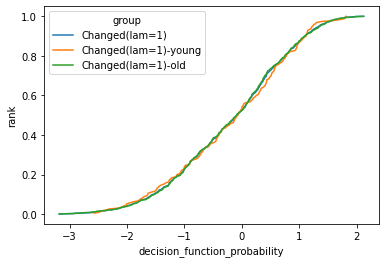

In [12]:
#Check in the graph how the distribution of the probability of being classed 1
#by the svc model has been equalized for both classes.
#For each percentile rank, the same probability is attributed
def check_dist(predictor,X,X_t,keyword):
  min,maj=min_maj(X,True)
  eval_df = pd.DataFrame({"decision_function_probability":predictor.decision_function(X_t),"group":[keyword for i in range(len(X))]})
  eval_df['rank'] = eval_df["decision_function_probability"].rank(ascending=1,pct=True)
  eval_df1 = pd.DataFrame({"decision_function_probability":predictor.decision_function(min),"group":[keyword+'-young' for i in range(len(min))]})
  eval_df1['rank'] = eval_df1["decision_function_probability"].rank(ascending=1,pct=True)
  eval_df2 = pd.DataFrame({"decision_function_probability":predictor.decision_function(maj),"group":[keyword+'-old' for i in range(len(maj))]})
  eval_df2['rank'] = eval_df2["decision_function_probability"].rank(ascending=1,pct=True)
  eval_df=eval_df.append(eval_df1,ignore_index=True)
  eval_df=eval_df.append(eval_df2,ignore_index=True)
  return eval_df

eval = check_dist(svc_new,new_df.drop('class',axis=1),full_pipeline.fit_transform(new_df.drop('class',axis=1)),'Changed(lam=1)')
sns.lineplot(x="decision_function_probability",y="rank",hue='group',data=eval)

In [13]:
#Split into test and training set
#Now see how the model changes for the different new datasets
def predict(new_df,c):
  new_df['class']=new_df['class'].astype(float).astype(int)
  new_y=new_df['class']
  X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_df.drop('class',axis=1), new_y, test_size=0.333,stratify=new_y,shuffle=True,random_state=c)
  X_train_new = full_pipeline.fit_transform(X_train_new)
  X_test_orig_new = X_test_new.copy()
  X_test_new = full_pipeline.transform(X_test_new)
  #Implement Machine Learning algorithm: SVC
  svc_new = LinearSVC(random_state=0,penalty='l2', loss='hinge',class_weight='balanced')#, C=2)
  Cs = [0.001,0.005,0.01,0.05,0.1,0.5,1,5, 10]
  svc_grid = {'C':Cs} 
  svc_grid_search_new = GridSearchCV(svc_new, svc_grid, refit = True, verbose = 3, n_jobs=-1,cv=5)
  svc_grid_search_new.fit(X_train_new,y_train_new)
  print("svc best estimator:",svc_grid_search_new.best_estimator_)
  svc_new = svc_grid_search_new.best_estimator_
  y_pred_new = svc_new.predict(X_test_new)
  print(classification_report(y_test_new, y_pred_new))
  svc_score_new=svc_new.score(X_test_new,y_test_new)
  print("model accuracy: %.5f" % svc_score_new)
  print("balanced accuracy rate: %.5f" % balanced_accuracy_score(y_test_new, y_pred_new))
  # balanced error rate
  X_test_young_new,X_test_old_new = min_maj(X_test_orig_new,True)
  print("Zemel fairness: ",1-zemel_fairness(X_test_young_new,X_test_old_new,svc_new))
  print("Disparate Impact: ",disparate_impact(X_test_young_new,X_test_old_new,svc_new))
  print("----------------------")
  return svc_score_new,balanced_accuracy_score(y_test_new, y_pred_new),1-zemel_fairness(X_test_young_new,X_test_old_new,svc_new),disparate_impact(X_test_young_new,X_test_old_new,svc_new)

model_accuracies=[]
utilities = []
zemel_fairnesses = []
disparate_impact_scores=[]
for df in df_list:
  accs=[]
  utils=[]
  zems=[]
  diss=[]
  for i in range(10):
    acc,util,zem,dis = predict(df,i)
    accs.append(acc)
    utils.append(util)
    zems.append(zem)
    diss.append(dis)
  acc=mean(accs)
  util=mean(utils)
  zem=mean(zems)
  dis=mean(diss)
  model_accuracies.append(acc)
  utilities.append(util)
  zemel_fairnesses.append(zem)
  disparate_impact_scores.append(dis)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.90      0.68      0.77       233
           2       0.53      0.83      0.64       100

    accuracy                           0.72       333
   macro avg       0.71      0.75      0.71       333
weighted avg       0.79      0.72      0.74       333

model accuracy: 0.72372
balanced accuracy rate: 0.75406
26 73
160 260
Zemel fairness:  0.7407797681770284
Disparate Impact:  0.5787671232876712
----------------------
26 73
160 260
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.69      0.78       233
           2       0.52      0.79      0.63       100

    accuracy                           0.72       333
   macro avg       0.70      0.74      0.70       333
weighted avg       0.78      0.72      0.73       333

model accuracy: 0.72072
balanced accuracy rate: 0.74049
17 68
163 265
Zemel fairness:  0.6349056603773585
Disparate Impact:  0.4064417177914111
----------------------
17 68
163 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.68      0.76       233
           2       0.49      0.73      0.59       100

    accuracy                           0.69       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.75      0.69      0.71       333

model accuracy: 0.69369
balanced accuracy rate: 0.70406
17 60
170 273
Zemel fairness:  0.6606227106227106
Disparate Impact:  0.45499999999999996
----------------------
17 60
170 273
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       233
           2       0.49      0.73      0.58       100

    accuracy                           0.69       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.68769
balanced accuracy rate: 0.69976
13 54
174 279
Zemel fairness:  0.6170848267622461
Disparate Impact:  0.38601532567049807
----------------------
13 54
174 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.89      0.68      0.77       233
           2       0.52      0.80      0.63       100

    accuracy                           0.72       333
   macro avg       0.70      0.74      0.70       333
weighted avg       0.78      0.72      0.73       333

model accuracy: 0.71772
balanced accuracy rate: 0.74120
20 64
166 269
Zemel fairness:  0.6953996282527881
Disparate Impact:  0.5064006024096386
----------------------
20 64
166 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.68      0.76       233
           2       0.50      0.74      0.60       100

    accuracy                           0.70       333
   macro avg       0.68      0.71      0.68       333
weighted avg       0.75      0.70      0.71       333

model accuracy: 0.69970
balanced accuracy rate: 0.71120
24 65
168 268
Zemel fairness:  0.7423650975889782
Disparate Impact:  0.589010989010989
----------------------
24 65
168 268
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.73      0.78       233
           2       0.52      0.67      0.59       100

    accuracy                           0.71       333
   macro avg       0.68      0.70      0.68       333
weighted avg       0.74      0.71      0.72       333

model accuracy: 0.71471
balanced accuracy rate: 0.70195
20 64
171 269
Zemel fairness:  0.6768122676579925
Disparate Impact:  0.49159356725146197
----------------------
20 64
171 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.72      0.79       233
           2       0.54      0.78      0.64       100

    accuracy                           0.74       333
   macro avg       0.71      0.75      0.72       333
weighted avg       0.78      0.74      0.75       333

model accuracy: 0.73574
balanced accuracy rate: 0.74837
28 72
162 261
Zemel fairness:  0.7681992337164751
Disparate Impact:  0.6265432098765432
----------------------
28 72
162 261
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.71      0.77       233
           2       0.50      0.68      0.58       100

    accuracy                           0.70       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.74      0.70      0.71       333

model accuracy: 0.70270
balanced accuracy rate: 0.69622
28 69
165 264
Zemel fairness:  0.7807971014492754
Disparate Impact:  0.6492753623188406
----------------------
28 69
165 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       233
           2       0.52      0.77      0.62       100

    accuracy                           0.72       333
   macro avg       0.70      0.73      0.70       333
weighted avg       0.77      0.72      0.73       333

model accuracy: 0.72072
balanced accuracy rate: 0.73479
23 68
168 265
Zemel fairness:  0.7042730299667037
Disparate Impact:  0.5335259103641458
----------------------
23 68
168 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.90      0.68      0.77       233
           2       0.53      0.83      0.64       100

    accuracy                           0.72       333
   macro avg       0.71      0.75      0.71       333
weighted avg       0.79      0.72      0.74       333

model accuracy: 0.72372
balanced accuracy rate: 0.75406
26 73
160 260
Zemel fairness:  0.7407797681770284
Disparate Impact:  0.5787671232876712
----------------------
26 73
160 260
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.69      0.78       233
           2       0.52      0.79      0.63       100

    accuracy                           0.72       333
   macro avg       0.70      0.74      0.70       333
weighted avg       0.78      0.72      0.73       333

model accuracy: 0.72072
balanced accuracy rate: 0.74049
17 68
163 265
Zemel fairness:  0.6349056603773585
Disparate Impact:  0.4064417177914111
----------------------
17 68
163 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.68      0.76       233
           2       0.49      0.73      0.59       100

    accuracy                           0.69       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.75      0.69      0.71       333

model accuracy: 0.69369
balanced accuracy rate: 0.70406
17 60
170 273
Zemel fairness:  0.6606227106227106
Disparate Impact:  0.45499999999999996
----------------------
17 60
170 273
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       233
           2       0.49      0.73      0.58       100

    accuracy                           0.69       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.68769
balanced accuracy rate: 0.69976
13 54
174 279
Zemel fairness:  0.6170848267622461
Disparate Impact:  0.38601532567049807
----------------------
13 54
174 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.89      0.68      0.77       233
           2       0.52      0.80      0.63       100

    accuracy                           0.72       333
   macro avg       0.70      0.74      0.70       333
weighted avg       0.78      0.72      0.73       333

model accuracy: 0.71772
balanced accuracy rate: 0.74120
20 64
166 269
Zemel fairness:  0.6953996282527881
Disparate Impact:  0.5064006024096386
----------------------
20 64
166 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.68      0.76       233
           2       0.50      0.74      0.60       100

    accuracy                           0.70       333
   macro avg       0.68      0.71      0.68       333
weighted avg       0.75      0.70      0.71       333

model accuracy: 0.69970
balanced accuracy rate: 0.71120
24 65
168 268
Zemel fairness:  0.7423650975889782
Disparate Impact:  0.589010989010989
----------------------
24 65
168 268
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.73      0.78       233
           2       0.52      0.67      0.59       100

    accuracy                           0.71       333
   macro avg       0.68      0.70      0.68       333
weighted avg       0.74      0.71      0.72       333

model accuracy: 0.71471
balanced accuracy rate: 0.70195
20 64
171 269
Zemel fairness:  0.6768122676579925
Disparate Impact:  0.49159356725146197
----------------------
20 64
171 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.72      0.79       233
           2       0.54      0.78      0.64       100

    accuracy                           0.74       333
   macro avg       0.71      0.75      0.72       333
weighted avg       0.78      0.74      0.75       333

model accuracy: 0.73574
balanced accuracy rate: 0.74837
28 72
162 261
Zemel fairness:  0.7681992337164751
Disparate Impact:  0.6265432098765432
----------------------
28 72
162 261
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.71      0.77       233
           2       0.50      0.68      0.58       100

    accuracy                           0.70       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.74      0.70      0.71       333

model accuracy: 0.70270
balanced accuracy rate: 0.69622
28 69
165 264
Zemel fairness:  0.7807971014492754
Disparate Impact:  0.6492753623188406
----------------------
28 69
165 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       233
           2       0.52      0.77      0.62       100

    accuracy                           0.72       333
   macro avg       0.70      0.73      0.70       333
weighted avg       0.77      0.72      0.73       333

model accuracy: 0.72072
balanced accuracy rate: 0.73479
23 68
168 265
Zemel fairness:  0.7042730299667037
Disparate Impact:  0.5335259103641458
----------------------
23 68
168 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.90      0.68      0.78       233
           2       0.53      0.83      0.65       100

    accuracy                           0.73       333
   macro avg       0.72      0.76      0.71       333
weighted avg       0.79      0.73      0.74       333

model accuracy: 0.72673
balanced accuracy rate: 0.75620
26 73
160 260
Zemel fairness:  0.7407797681770284
Disparate Impact:  0.5787671232876712
----------------------
26 73
160 260
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.69      0.78       233
           2       0.52      0.79      0.63       100

    accuracy                           0.72       333
   macro avg       0.70      0.74      0.70       333
weighted avg       0.78      0.72      0.73       333

model accuracy: 0.72072
balanced accuracy rate: 0.74049
17 68
163 265
Zemel fairness:  0.6349056603773585
Disparate Impact:  0.4064417177914111
----------------------
17 68
163 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.68      0.75       233
           2       0.49      0.72      0.58       100

    accuracy                           0.69       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.69069
balanced accuracy rate: 0.69906
17 60
169 273
Zemel fairness:  0.6642857142857143
Disparate Impact:  0.4576923076923077
----------------------
17 60
169 273
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       233
           2       0.49      0.73      0.59       100

    accuracy                           0.69       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.69069
balanced accuracy rate: 0.70191
13 54
174 279
Zemel fairness:  0.6170848267622461
Disparate Impact:  0.38601532567049807
----------------------
13 54
174 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.89      0.68      0.77       233
           2       0.52      0.80      0.63       100

    accuracy                           0.72       333
   macro avg       0.70      0.74      0.70       333
weighted avg       0.78      0.72      0.73       333

model accuracy: 0.71772
balanced accuracy rate: 0.74120
20 64
166 269
Zemel fairness:  0.6953996282527881
Disparate Impact:  0.5064006024096386
----------------------
20 64
166 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.68      0.76       233
           2       0.50      0.74      0.60       100

    accuracy                           0.70       333
   macro avg       0.68      0.71      0.68       333
weighted avg       0.75      0.70      0.71       333

model accuracy: 0.69970
balanced accuracy rate: 0.71120
24 65
167 268
Zemel fairness:  0.7460964408725603
Disparate Impact:  0.5925380009212345
----------------------
24 65
167 268
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.72      0.77       233
           2       0.51      0.67      0.58       100

    accuracy                           0.71       333
   macro avg       0.67      0.70      0.68       333
weighted avg       0.74      0.71      0.72       333

model accuracy: 0.70571
balanced accuracy rate: 0.69552
20 64
171 269
Zemel fairness:  0.6768122676579925
Disparate Impact:  0.49159356725146197
----------------------
20 64
171 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.73      0.79       233
           2       0.54      0.76      0.63       100

    accuracy                           0.74       333
   macro avg       0.71      0.74      0.71       333
weighted avg       0.78      0.74      0.75       333

model accuracy: 0.73574
balanced accuracy rate: 0.74266
29 72
164 261
Zemel fairness:  0.7744252873563219
Disparate Impact:  0.6410060975609757
----------------------
29 72
164 261
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.72      0.77       233
           2       0.51      0.67      0.58       100

    accuracy                           0.71       333
   macro avg       0.67      0.70      0.68       333
weighted avg       0.74      0.71      0.72       333

model accuracy: 0.70571
balanced accuracy rate: 0.69552
28 69
167 264
Zemel fairness:  0.7732213438735178
Disparate Impact:  0.6414996094766988
----------------------
28 69
167 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       233
           2       0.52      0.77      0.62       100

    accuracy                           0.72       333
   macro avg       0.70      0.73      0.70       333
weighted avg       0.77      0.72      0.73       333

model accuracy: 0.72072
balanced accuracy rate: 0.73479
23 68
168 265
Zemel fairness:  0.7042730299667037
Disparate Impact:  0.5335259103641458
----------------------
23 68
168 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.71      0.78       243
           2       0.48      0.71      0.57        90

    accuracy                           0.71       333
   macro avg       0.67      0.71      0.68       333
weighted avg       0.76      0.71      0.73       333

model accuracy: 0.71171
balanced accuracy rate: 0.71152
39 63
157 270
Zemel fairness:  1.0375661375661376
Disparate Impact:  1.064604185623294
----------------------
39 63
157 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       243
           2       0.43      0.68      0.53        90

    accuracy                           0.67       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.74      0.67      0.69       333

model accuracy: 0.66967
balanced accuracy rate: 0.67222
27 66
160 267
Zemel fairness:  0.809839972761321
Disparate Impact:  0.6826704545454546
----------------------
27 66
160 267
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.70      0.76       243
           2       0.44      0.63      0.52        90

    accuracy                           0.68       333
   macro avg       0.64      0.66      0.64       333
weighted avg       0.73      0.68      0.69       333

model accuracy: 0.67868
balanced accuracy rate: 0.66440
39 62
160 271
Zemel fairness:  1.0386263540054754
Disparate Impact:  1.0654233870967742
----------------------
39 62
160 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.72      0.78       243
           2       0.47      0.67      0.55        90

    accuracy                           0.71       333
   macro avg       0.66      0.69      0.67       333
weighted avg       0.75      0.71      0.72       333

model accuracy: 0.70571
balanced accuracy rate: 0.69342
32 57
166 276
Zemel fairness:  0.959954233409611
Disparate Impact:  0.9334178820545339
----------------------
32 57
166 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.65      0.73       243
           2       0.41      0.67      0.51        90

    accuracy                           0.65       333
   macro avg       0.63      0.66      0.62       333
weighted avg       0.73      0.65      0.67       333

model accuracy: 0.65465
balanced accuracy rate: 0.65844
28 64
160 269
Zemel fairness:  0.8427044609665427
Disparate Impact:  0.7355468749999999
----------------------
28 64
160 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.71      0.77       243
           2       0.44      0.62      0.52        90

    accuracy                           0.68       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.68      0.70       333

model accuracy: 0.68468
balanced accuracy rate: 0.66502
33 69
172 264
Zemel fairness:  0.8267457180500659
Disparate Impact:  0.7340748230535895
----------------------
33 69
172 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.69      0.76       243
           2       0.43      0.63      0.51        90

    accuracy                           0.68       333
   macro avg       0.63      0.66      0.64       333
weighted avg       0.73      0.68      0.69       333

model accuracy: 0.67568
balanced accuracy rate: 0.66235
31 54
169 279
Zemel fairness:  0.9683393070489844
Disparate Impact:  0.9477317554240631
----------------------
31 54
169 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.67      0.76       243
           2       0.46      0.74      0.57        90

    accuracy                           0.69       333
   macro avg       0.67      0.71      0.66       333
weighted avg       0.76      0.69      0.71       333

model accuracy: 0.69069
balanced accuracy rate: 0.70761
26 69
158 264
Zemel fairness:  0.77832674571805
Disparate Impact:  0.6296092460099064
----------------------
26 69
158 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.89      0.69      0.78       243
           2       0.48      0.77      0.59        90

    accuracy                           0.71       333
   macro avg       0.68      0.73      0.68       333
weighted avg       0.78      0.71      0.73       333

model accuracy: 0.71171
balanced accuracy rate: 0.72901
22 51
164 282
Zemel fairness:  0.8498122653316647
Disparate Impact:  0.7417503586800575
----------------------
22 51
164 282
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.66      0.75       243
           2       0.44      0.71      0.54        90

    accuracy                           0.67       333
   macro avg       0.65      0.68      0.64       333
weighted avg       0.75      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.68477
23 58
166 275
Zemel fairness:  0.7929153605015674
Disparate Impact:  0.656938097216452
----------------------
23 58
166 275
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.90      0.68      0.77       233
           2       0.53      0.83      0.64       100

    accuracy                           0.72       333
   macro avg       0.71      0.75      0.71       333
weighted avg       0.79      0.72      0.74       333

model accuracy: 0.72372
balanced accuracy rate: 0.75406
25 73
160 260
Zemel fairness:  0.7270811380400422
Disparate Impact:  0.5565068493150684
----------------------
25 73
160 260
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.69      0.78       233
           2       0.52      0.79      0.63       100

    accuracy                           0.72       333
   macro avg       0.70      0.74      0.70       333
weighted avg       0.78      0.72      0.73       333

model accuracy: 0.72072
balanced accuracy rate: 0.74049
17 68
163 265
Zemel fairness:  0.6349056603773585
Disparate Impact:  0.4064417177914111
----------------------
17 68
163 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.68      0.75       233
           2       0.49      0.72      0.58       100

    accuracy                           0.69       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.69069
balanced accuracy rate: 0.69906
17 60
169 273
Zemel fairness:  0.6642857142857143
Disparate Impact:  0.4576923076923077
----------------------
17 60
169 273
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       233
           2       0.49      0.73      0.59       100

    accuracy                           0.69       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.69069
balanced accuracy rate: 0.70191
13 54
174 279
Zemel fairness:  0.6170848267622461
Disparate Impact:  0.38601532567049807
----------------------
13 54
174 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.89      0.68      0.77       233
           2       0.52      0.80      0.63       100

    accuracy                           0.72       333
   macro avg       0.70      0.74      0.70       333
weighted avg       0.78      0.72      0.73       333

model accuracy: 0.71772
balanced accuracy rate: 0.74120
20 64
163 269
Zemel fairness:  0.7065520446096655
Disparate Impact:  0.5157208588957055
----------------------
20 64
163 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.68      0.76       233
           2       0.50      0.74      0.59       100

    accuracy                           0.70       333
   macro avg       0.68      0.71      0.68       333
weighted avg       0.75      0.70      0.71       333

model accuracy: 0.69670
balanced accuracy rate: 0.70906
22 65
169 268
Zemel fairness:  0.7078645235361654
Disparate Impact:  0.5367319071461084
----------------------
22 65
169 268
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.73      0.78       233
           2       0.52      0.67      0.58       100

    accuracy                           0.71       333
   macro avg       0.68      0.70      0.68       333
weighted avg       0.74      0.71      0.72       333

model accuracy: 0.71171
balanced accuracy rate: 0.69981
21 64
171 269
Zemel fairness:  0.6924372676579925
Disparate Impact:  0.5161732456140351
----------------------
21 64
171 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.72      0.79       233
           2       0.54      0.77      0.64       100

    accuracy                           0.74       333
   macro avg       0.71      0.75      0.71       333
weighted avg       0.78      0.74      0.75       333

model accuracy: 0.73574
balanced accuracy rate: 0.74552
29 72
163 261
Zemel fairness:  0.7782567049808429
Disparate Impact:  0.6449386503067485
----------------------
29 72
163 261
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.73      0.78       233
           2       0.52      0.68      0.59       100

    accuracy                           0.72       333
   macro avg       0.68      0.71      0.69       333
weighted avg       0.75      0.72      0.73       333

model accuracy: 0.71772
balanced accuracy rate: 0.70695
29 69
168 264
Zemel fairness:  0.7839262187088274
Disparate Impact:  0.660455486542443
----------------------
29 69
168 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.69      0.77       233
           2       0.52      0.77      0.62       100

    accuracy                           0.71       333
   macro avg       0.70      0.73      0.70       333
weighted avg       0.77      0.71      0.73       333

model accuracy: 0.71471
balanced accuracy rate: 0.73049
23 68
168 265
Zemel fairness:  0.7042730299667037
Disparate Impact:  0.5335259103641458
----------------------
23 68
168 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       243
           2       0.48      0.74      0.58        90

    accuracy                           0.71       333
   macro avg       0.68      0.72      0.68       333
weighted avg       0.77      0.71      0.72       333

model accuracy: 0.70871
balanced accuracy rate: 0.71996
38 63
153 270
Zemel fairness:  1.0365079365079364
Disparate Impact:  1.0644257703081232
----------------------
38 63
153 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.66      0.75       243
           2       0.43      0.69      0.53        90

    accuracy                           0.67       333
   macro avg       0.64      0.68      0.64       333
weighted avg       0.74      0.67      0.69       333

model accuracy: 0.66967
balanced accuracy rate: 0.67572
29 66
160 267
Zemel fairness:  0.8401430030643513
Disparate Impact:  0.7332386363636363
----------------------
29 66
160 267
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.70      0.77       243
           2       0.45      0.66      0.53        90

    accuracy                           0.69       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.69      0.71       333

model accuracy: 0.69069
balanced accuracy rate: 0.67963
37 62
162 271
Zemel fairness:  0.9989882156886085
Disparate Impact:  0.9983074472321785
----------------------
37 62
162 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.69      0.76       243
           2       0.45      0.68      0.54        90

    accuracy                           0.68       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.68      0.70       333

model accuracy: 0.68468
balanced accuracy rate: 0.68251
31 57
156 276
Zemel fairness:  0.9786422578184593
Disparate Impact:  0.9622132253711202
----------------------
31 57
156 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.63      0.72       243
           2       0.40      0.67      0.50        90

    accuracy                           0.64       333
   macro avg       0.62      0.65      0.61       333
weighted avg       0.72      0.64      0.66       333

model accuracy: 0.63964
balanced accuracy rate: 0.64815
28 64
160 269
Zemel fairness:  0.8427044609665427
Disparate Impact:  0.7355468749999999
----------------------
28 64
160 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.72      0.77       243
           2       0.45      0.63      0.53        90

    accuracy                           0.69       333
   macro avg       0.65      0.67      0.65       333
weighted avg       0.74      0.69      0.71       333

model accuracy: 0.69369
balanced accuracy rate: 0.67469
35 69
168 264
Zemel fairness:  0.8708827404479579
Disparate Impact:  0.7971014492753624
----------------------
35 69
168 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.70      0.76       243
           2       0.44      0.64      0.52        90

    accuracy                           0.68       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.68      0.70       333

model accuracy: 0.68168
balanced accuracy rate: 0.66996
31 54
168 279
Zemel fairness:  0.9719235364396654
Disparate Impact:  0.9533730158730158
----------------------
31 54
168 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.70      0.78       243
           2       0.47      0.72      0.57        90

    accuracy                           0.71       333
   macro avg       0.67      0.71      0.67       333
weighted avg       0.76      0.71      0.72       333

model accuracy: 0.70571
balanced accuracy rate: 0.71091
30 69
163 264
Zemel fairness:  0.8173583662714097
Disparate Impact:  0.704187783408909
----------------------
30 69
163 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.89      0.68      0.77       243
           2       0.47      0.78      0.59        90

    accuracy                           0.71       333
   macro avg       0.68      0.73      0.68       333
weighted avg       0.78      0.71      0.72       333

model accuracy: 0.70571
balanced accuracy rate: 0.72840
20 51
165 282
Zemel fairness:  0.8070504797663747
Disparate Impact:  0.6702317290552584
----------------------
20 51
165 282
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.67      0.75       243
           2       0.44      0.71      0.55        90

    accuracy                           0.68       333
   macro avg       0.65      0.69      0.65       333
weighted avg       0.75      0.68      0.70       333

model accuracy: 0.68168
balanced accuracy rate: 0.69095
23 58
170 275
Zemel fairness:  0.7783699059561129
Disparate Impact:  0.6414807302231238
----------------------
23 58
170 275
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.71      0.79       233
           2       0.53      0.78      0.63       100

    accuracy                           0.73       333
   macro avg       0.71      0.74      0.71       333
weighted avg       0.78      0.73      0.74       333

model accuracy: 0.72973
balanced accuracy rate: 0.74408
27 73
166 260
Zemel fairness:  0.7314014752370916
Disparate Impact:  0.5793035154315894
----------------------
27 73
166 260
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.73      0.79       233
           2       0.54      0.74      0.62       100

    accuracy                           0.73       333
   macro avg       0.70      0.73      0.71       333
weighted avg       0.77      0.73      0.74       333

model accuracy: 0.73273
balanced accuracy rate: 0.73481
26 68
173 265
Zemel fairness:  0.7295227524972253
Disparate Impact:  0.5856851411084665
----------------------
26 68
173 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.68      0.75       233
           2       0.49      0.72      0.58       100

    accuracy                           0.69       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.69069
balanced accuracy rate: 0.69906
16 60
167 273
Zemel fairness:  0.6549450549450548
Disparate Impact:  0.4359281437125748
----------------------
16 60
167 273
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.69      0.77       233
           2       0.51      0.74      0.60       100

    accuracy                           0.71       333
   macro avg       0.68      0.72      0.68       333
weighted avg       0.75      0.71      0.72       333

model accuracy: 0.70571
balanced accuracy rate: 0.71549
13 54
174 279
Zemel fairness:  0.6170848267622461
Disparate Impact:  0.38601532567049807
----------------------
13 54
174 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.72      0.79       233
           2       0.53      0.75      0.62       100

    accuracy                           0.73       333
   macro avg       0.70      0.73      0.70       333
weighted avg       0.77      0.73      0.74       333

model accuracy: 0.72673
balanced accuracy rate: 0.73337
21 64
175 269
Zemel fairness:  0.6775673791821561
Disparate Impact:  0.504375
----------------------
21 64
175 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.69      0.76       233
           2       0.50      0.72      0.59       100

    accuracy                           0.70       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.74      0.70      0.71       333

model accuracy: 0.69670
balanced accuracy rate: 0.70335
23 65
171 268
Zemel fairness:  0.7157864523536166
Disparate Impact:  0.554565901934323
----------------------
23 65
171 268
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.76      0.80       233
           2       0.55      0.68      0.61       100

    accuracy                           0.74       333
   macro avg       0.70      0.72      0.71       333
weighted avg       0.76      0.74      0.75       333

model accuracy: 0.73874
balanced accuracy rate: 0.72197
22 64
175 269
Zemel fairness:  0.6931923791821561
Disparate Impact:  0.5283928571428571
----------------------
22 64
175 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.72      0.79       233
           2       0.54      0.76      0.63       100

    accuracy                           0.73       333
   macro avg       0.71      0.74      0.71       333
weighted avg       0.77      0.73      0.74       333

model accuracy: 0.73273
balanced accuracy rate: 0.74052
29 72
165 261
Zemel fairness:  0.7705938697318008
Disparate Impact:  0.6371212121212121
----------------------
29 72
165 261
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.75      0.79       233
           2       0.53      0.66      0.59       100

    accuracy                           0.72       333
   macro avg       0.68      0.70      0.69       333
weighted avg       0.74      0.72      0.73       333

model accuracy: 0.72072
balanced accuracy rate: 0.70339
25 69
168 264
Zemel fairness:  0.7259552042160737
Disparate Impact:  0.5693581780538303
----------------------
25 69
168 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.69      0.77       233
           2       0.51      0.75      0.60       100

    accuracy                           0.71       333
   macro avg       0.69      0.72      0.69       333
weighted avg       0.76      0.71      0.72       333

model accuracy: 0.70571
balanced accuracy rate: 0.71835
23 68
169 265
Zemel fairness:  0.7004994450610433
Disparate Impact:  0.5303689523146538
----------------------
23 68
169 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       243
           2       0.47      0.73      0.58        90

    accuracy                           0.71       333
   macro avg       0.68      0.72      0.68       333
weighted avg       0.77      0.71      0.72       333

model accuracy: 0.70871
balanced accuracy rate: 0.71646
38 63
154 270
Zemel fairness:  1.0328042328042328
Disparate Impact:  1.0575139146567716
----------------------
38 63
154 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.65      0.74       243
           2       0.43      0.70      0.53        90

    accuracy                           0.66       333
   macro avg       0.64      0.68      0.63       333
weighted avg       0.74      0.66      0.68       333

model accuracy: 0.66366
balanced accuracy rate: 0.67510
26 66
157 267
Zemel fairness:  0.8059244126659857
Disparate Impact:  0.6699478865083961
----------------------
26 66
157 267
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.71      0.77       243
           2       0.45      0.64      0.53        90

    accuracy                           0.69       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.69      0.71       333

model accuracy: 0.69369
balanced accuracy rate: 0.67819
37 62
162 271
Zemel fairness:  0.9989882156886085
Disparate Impact:  0.9983074472321785
----------------------
37 62
162 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       243
           2       0.43      0.68      0.53        90

    accuracy                           0.67       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.74      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.67428
31 57
158 276
Zemel fairness:  0.971395881006865
Disparate Impact:  0.9500333111259162
----------------------
31 57
158 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.70      0.76       243
           2       0.44      0.66      0.53        90

    accuracy                           0.68       333
   macro avg       0.64      0.68      0.65       333
weighted avg       0.74      0.68      0.70       333

model accuracy: 0.68468
balanced accuracy rate: 0.67551
32 64
174 269
Zemel fairness:  0.8531598513011153
Disparate Impact:  0.7729885057471265
----------------------
32 64
174 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.70      0.76       243
           2       0.44      0.66      0.53        90

    accuracy                           0.68       333
   macro avg       0.64      0.68      0.65       333
weighted avg       0.74      0.68      0.70       333

model accuracy: 0.68468
balanced accuracy rate: 0.67551
34 69
163 264
Zemel fairness:  0.8753293807641633
Disparate Impact:  0.7980794878634303
----------------------
34 69
163 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.70      0.77       243
           2       0.45      0.66      0.53        90

    accuracy                           0.69       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.68769
balanced accuracy rate: 0.67757
31 54
171 279
Zemel fairness:  0.9611708482676224
Disparate Impact:  0.9366471734892787
----------------------
31 54
171 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.69      0.77       243
           2       0.46      0.71      0.56        90

    accuracy                           0.69       333
   macro avg       0.66      0.70      0.66       333
weighted avg       0.75      0.69      0.71       333

model accuracy: 0.69369
balanced accuracy rate: 0.69918
30 69
162 264
Zemel fairness:  0.8211462450592886
Disparate Impact:  0.7085346215780998
----------------------
30 69
162 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       243
           2       0.48      0.76      0.59        90

    accuracy                           0.71       333
   macro avg       0.68      0.73      0.68       333
weighted avg       0.78      0.71      0.73       333

model accuracy: 0.71171
balanced accuracy rate: 0.72551
21 51
167 282
Zemel fairness:  0.8195661243220692
Disparate Impact:  0.6953152518492426
----------------------
21 51
167 282
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.65      0.74       243
           2       0.42      0.69      0.52        90

    accuracy                           0.66       333
   macro avg       0.64      0.67      0.63       333
weighted avg       0.73      0.66      0.68       333

model accuracy: 0.66066
balanced accuracy rate: 0.66955
23 58
170 275
Zemel fairness:  0.7783699059561129
Disparate Impact:  0.6414807302231238
----------------------
23 58
170 275
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       233
           2       0.52      0.78      0.63       100

    accuracy                           0.72       333
   macro avg       0.70      0.74      0.70       333
weighted avg       0.77      0.72      0.73       333

model accuracy: 0.72072
balanced accuracy rate: 0.73764
28 73
164 260
Zemel fairness:  0.7527924130663857
Disparate Impact:  0.6080855329101236
----------------------
28 73
164 260
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       233
           2       0.53      0.78      0.63       100

    accuracy                           0.73       333
   macro avg       0.71      0.74      0.71       333
weighted avg       0.78      0.73      0.74       333

model accuracy: 0.72673
balanced accuracy rate: 0.74193
20 68
165 265
Zemel fairness:  0.6714761376248612
Disparate Impact:  0.4723707664884136
----------------------
20 68
165 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.68      0.75       233
           2       0.49      0.72      0.58       100

    accuracy                           0.69       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.69069
balanced accuracy rate: 0.69906
16 60
167 273
Zemel fairness:  0.6549450549450548
Disparate Impact:  0.4359281437125748
----------------------
16 60
167 273
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.69      0.76       233
           2       0.50      0.73      0.59       100

    accuracy                           0.70       333
   macro avg       0.68      0.71      0.68       333
weighted avg       0.75      0.70      0.71       333

model accuracy: 0.69970
balanced accuracy rate: 0.70835
14 54
172 279
Zemel fairness:  0.6427718040621266
Disparate Impact:  0.4205426356589147
----------------------
14 54
172 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.89      0.68      0.77       233
           2       0.52      0.81      0.64       100

    accuracy                           0.72       333
   macro avg       0.71      0.75      0.70       333
weighted avg       0.78      0.72      0.73       333

model accuracy: 0.72072
balanced accuracy rate: 0.74620
20 64
163 269
Zemel fairness:  0.7065520446096655
Disparate Impact:  0.5157208588957055
----------------------
20 64
163 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.69      0.76       233
           2       0.50      0.73      0.59       100

    accuracy                           0.70       333
   macro avg       0.68      0.71      0.68       333
weighted avg       0.75      0.70      0.71       333

model accuracy: 0.69970
balanced accuracy rate: 0.70835
23 65
172 268
Zemel fairness:  0.7120551090700344
Disparate Impact:  0.5513416815742398
----------------------
23 65
172 268
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.75      0.79       233
           2       0.54      0.68      0.60       100

    accuracy                           0.73       333
   macro avg       0.69      0.71      0.70       333
weighted avg       0.75      0.73      0.73       333

model accuracy: 0.72673
balanced accuracy rate: 0.71339
21 64
175 269
Zemel fairness:  0.6775673791821561
Disparate Impact:  0.504375
----------------------
21 64
175 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.72      0.79       233
           2       0.54      0.77      0.63       100

    accuracy                           0.73       333
   macro avg       0.71      0.74      0.71       333
weighted avg       0.78      0.73      0.74       333

model accuracy: 0.73273
balanced accuracy rate: 0.74337
29 72
164 261
Zemel fairness:  0.7744252873563219
Disparate Impact:  0.6410060975609757
----------------------
29 72
164 261
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.76      0.79       233
           2       0.53      0.65      0.59       100

    accuracy                           0.72       333
   macro avg       0.68      0.70      0.69       333
weighted avg       0.74      0.72      0.73       333

model accuracy: 0.72372
balanced accuracy rate: 0.70268
28 69
169 264
Zemel fairness:  0.7656455862977603
Disparate Impact:  0.633907898121945
----------------------
28 69
169 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.70      0.77       233
           2       0.52      0.75      0.61       100

    accuracy                           0.71       333
   macro avg       0.69      0.72      0.69       333
weighted avg       0.76      0.71      0.73       333

model accuracy: 0.71471
balanced accuracy rate: 0.72479
25 68
171 265
Zemel fairness:  0.7223640399556049
Disparate Impact:  0.5697454420364638
----------------------
25 68
171 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.71      0.79       243
           2       0.49      0.74      0.59        90

    accuracy                           0.72       333
   macro avg       0.69      0.73      0.69       333
weighted avg       0.78      0.72      0.73       333

model accuracy: 0.72072
balanced accuracy rate: 0.72819
40 63
153 270
Zemel fairness:  1.0682539682539682
Disparate Impact:  1.1204481792717087
----------------------
40 63
153 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.65      0.74       243
           2       0.43      0.70      0.53        90

    accuracy                           0.67       333
   macro avg       0.64      0.68      0.64       333
weighted avg       0.74      0.67      0.68       333

model accuracy: 0.66667
balanced accuracy rate: 0.67716
27 66
156 267
Zemel fairness:  0.8248212461695608
Disparate Impact:  0.7001748251748252
----------------------
27 66
156 267
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.70      0.76       243
           2       0.44      0.64      0.52        90

    accuracy                           0.68       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.68      0.70       333

model accuracy: 0.68168
balanced accuracy rate: 0.66996
36 62
161 271
Zemel fairness:  0.9865492203309131
Disparate Impact:  0.9773592466439592
----------------------
36 62
161 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.70      0.77       243
           2       0.45      0.68      0.54        90

    accuracy                           0.69       333
   macro avg       0.65      0.69      0.65       333
weighted avg       0.74      0.69      0.71       333

model accuracy: 0.69069
balanced accuracy rate: 0.68663
32 57
161 276
Zemel fairness:  0.9780701754385964
Disparate Impact:  0.9624060150375938
----------------------
32 57
161 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.70      0.77       243
           2       0.45      0.67      0.54        90

    accuracy                           0.69       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.69      0.71       333

model accuracy: 0.69069
balanced accuracy rate: 0.68313
32 64
171 269
Zemel fairness:  0.8643122676579925
Disparate Impact:  0.7865497076023391
----------------------
32 64
171 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.69      0.76       243
           2       0.44      0.66      0.52        90

    accuracy                           0.68       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.68      0.69       333

model accuracy: 0.67868
balanced accuracy rate: 0.67140
31 69
163 264
Zemel fairness:  0.8318511198945981
Disparate Impact:  0.7276607095225394
----------------------
31 69
163 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.70      0.77       243
           2       0.45      0.66      0.53        90

    accuracy                           0.69       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.68769
balanced accuracy rate: 0.67757
31 54
169 279
Zemel fairness:  0.9683393070489844
Disparate Impact:  0.9477317554240631
----------------------
31 54
169 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.69      0.77       243
           2       0.46      0.71      0.56        90

    accuracy                           0.70       333
   macro avg       0.66      0.70      0.66       333
weighted avg       0.76      0.70      0.71       333

model accuracy: 0.69670
balanced accuracy rate: 0.70123
29 69
160 264
Zemel fairness:  0.8142292490118577
Disparate Impact:  0.6934782608695652
----------------------
29 69
160 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.89      0.68      0.77       243
           2       0.47      0.77      0.58        90

    accuracy                           0.71       333
   macro avg       0.68      0.72      0.68       333
weighted avg       0.78      0.71      0.72       333

model accuracy: 0.70571
balanced accuracy rate: 0.72490
20 51
165 282
Zemel fairness:  0.8070504797663747
Disparate Impact:  0.6702317290552584
----------------------
20 51
165 282
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.65      0.74       243
           2       0.42      0.68      0.52        90

    accuracy                           0.66       333
   macro avg       0.63      0.67      0.63       333
weighted avg       0.73      0.66      0.68       333

model accuracy: 0.66066
balanced accuracy rate: 0.66605
23 58
171 275
Zemel fairness:  0.7747335423197492
Disparate Impact:  0.6377293809235733
----------------------
23 58
171 275
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.69      0.77       233
           2       0.52      0.78      0.62       100

    accuracy                           0.72       333
   macro avg       0.70      0.74      0.70       333
weighted avg       0.77      0.72      0.73       333

model accuracy: 0.71772
balanced accuracy rate: 0.73549
29 73
164 260
Zemel fairness:  0.766491043203372
Disparate Impact:  0.6298028733711994
----------------------
29 73
164 260
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       233
           2       0.53      0.78      0.63       100

    accuracy                           0.72       333
   macro avg       0.70      0.74      0.70       333
weighted avg       0.77      0.72      0.73       333

model accuracy: 0.72372
balanced accuracy rate: 0.73979
20 68
165 265
Zemel fairness:  0.6714761376248612
Disparate Impact:  0.4723707664884136
----------------------
20 68
165 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.68      0.76       233
           2       0.49      0.73      0.59       100

    accuracy                           0.69       333
   macro avg       0.67      0.70      0.67       333
weighted avg       0.75      0.69      0.71       333

model accuracy: 0.69369
balanced accuracy rate: 0.70406
16 60
166 273
Zemel fairness:  0.6586080586080587
Disparate Impact:  0.4385542168674699
----------------------
16 60
166 273
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.69      0.76       233
           2       0.50      0.74      0.60       100

    accuracy                           0.70       333
   macro avg       0.68      0.71      0.68       333
weighted avg       0.75      0.70      0.71       333

model accuracy: 0.70270
balanced accuracy rate: 0.71335
13 54
173 279
Zemel fairness:  0.6206690561529271
Disparate Impact:  0.3882466281310212
----------------------
13 54
173 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.89      0.68      0.77       233
           2       0.52      0.81      0.64       100

    accuracy                           0.72       333
   macro avg       0.71      0.75      0.70       333
weighted avg       0.78      0.72      0.73       333

model accuracy: 0.72072
balanced accuracy rate: 0.74620
20 64
163 269
Zemel fairness:  0.7065520446096655
Disparate Impact:  0.5157208588957055
----------------------
20 64
163 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.70      0.77       233
           2       0.51      0.73      0.60       100

    accuracy                           0.71       333
   macro avg       0.68      0.71      0.69       333
weighted avg       0.75      0.71      0.72       333

model accuracy: 0.70871
balanced accuracy rate: 0.71479
22 65
172 268
Zemel fairness:  0.6966704936854191
Disparate Impact:  0.5273703041144903
----------------------
22 65
172 268
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.76      0.80       233
           2       0.54      0.68      0.60       100

    accuracy                           0.73       333
   macro avg       0.70      0.72      0.70       333
weighted avg       0.76      0.73      0.74       333

model accuracy: 0.73273
balanced accuracy rate: 0.71768
21 64
174 269
Zemel fairness:  0.6812848513011153
Disparate Impact:  0.5072737068965517
----------------------
21 64
174 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.72      0.79       233
           2       0.54      0.77      0.64       100

    accuracy                           0.74       333
   macro avg       0.71      0.75      0.71       333
weighted avg       0.78      0.74      0.75       333

model accuracy: 0.73574
balanced accuracy rate: 0.74552
28 72
165 261
Zemel fairness:  0.7567049808429118
Disparate Impact:  0.6151515151515151
----------------------
28 72
165 261
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.76      0.79       233
           2       0.54      0.66      0.59       100

    accuracy                           0.73       333
   macro avg       0.69      0.71      0.69       333
weighted avg       0.75      0.73      0.73       333

model accuracy: 0.72673
balanced accuracy rate: 0.70768
28 69
171 264
Zemel fairness:  0.7580698287220027
Disparate Impact:  0.6264937706585304
----------------------
28 69
171 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.68      0.76       233
           2       0.50      0.76      0.61       100

    accuracy                           0.70       333
   macro avg       0.69      0.72      0.68       333
weighted avg       0.76      0.70      0.71       333

model accuracy: 0.70270
balanced accuracy rate: 0.71906
22 68
166 265
Zemel fairness:  0.6971143174250833
Disparate Impact:  0.5164776754075124
----------------------
22 68
166 265
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       243
           2       0.48      0.76      0.59        90

    accuracy                           0.71       333
   macro avg       0.68      0.73      0.68       333
weighted avg       0.78      0.71      0.73       333

model accuracy: 0.71171
balanced accuracy rate: 0.72551
36 63
153 270
Zemel fairness:  1.0047619047619047
Disparate Impact:  1.0084033613445378
----------------------
36 63
153 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.66      0.75       243
           2       0.43      0.70      0.54        90

    accuracy                           0.67       333
   macro avg       0.65      0.68      0.64       333
weighted avg       0.74      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.68128
28 66
156 267
Zemel fairness:  0.8399727613210759
Disparate Impact:  0.7261072261072261
----------------------
28 66
156 267
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.69      0.76       243
           2       0.43      0.64      0.52        90

    accuracy                           0.68       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.68      0.69       333

model accuracy: 0.67568
balanced accuracy rate: 0.66584
36 62
156 271
Zemel fairness:  1.0049994048327582
Disparate Impact:  1.0086848635235732
----------------------
36 62
156 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.71      0.78       243
           2       0.46      0.67      0.55        90

    accuracy                           0.70       333
   macro avg       0.66      0.69      0.66       333
weighted avg       0.75      0.70      0.71       333

model accuracy: 0.69970
balanced accuracy rate: 0.68930
37 57
159 276
Zemel fairness:  1.0730358504958049
Disparate Impact:  1.1267792121813969
----------------------
37 57
159 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.70      0.76       243
           2       0.44      0.66      0.53        90

    accuracy                           0.68       333
   macro avg       0.64      0.68      0.65       333
weighted avg       0.74      0.68      0.70       333

model accuracy: 0.68468
balanced accuracy rate: 0.67551
29 64
173 269
Zemel fairness:  0.8100023234200744
Disparate Impact:  0.7045700867052024
----------------------
29 64
173 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.67      0.74       243
           2       0.42      0.64      0.51        90

    accuracy                           0.66       333
   macro avg       0.63      0.66      0.62       333
weighted avg       0.72      0.66      0.68       333

model accuracy: 0.66066
balanced accuracy rate: 0.65556
33 69
160 264
Zemel fairness:  0.8722002635046113
Disparate Impact:  0.7891304347826087
----------------------
33 69
160 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.70      0.77       243
           2       0.45      0.67      0.54        90

    accuracy                           0.69       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.69      0.71       333

model accuracy: 0.69069
balanced accuracy rate: 0.68313
31 54
171 279
Zemel fairness:  0.9611708482676224
Disparate Impact:  0.9366471734892787
----------------------
31 54
171 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.67      0.76       243
           2       0.45      0.72      0.56        90

    accuracy                           0.69       333
   macro avg       0.66      0.70      0.66       333
weighted avg       0.76      0.69      0.70       333

model accuracy: 0.68769
balanced accuracy rate: 0.69856
29 69
157 264
Zemel fairness:  0.825592885375494
Disparate Impact:  0.7067294378288562
----------------------
29 69
157 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       243
           2       0.48      0.74      0.59        90

    accuracy                           0.71       333
   macro avg       0.68      0.72      0.68       333
weighted avg       0.77      0.71      0.73       333

model accuracy: 0.71471
balanced accuracy rate: 0.72407
19 51
171 282
Zemel fairness:  0.7661660408844388
Disparate Impact:  0.6143790849673202
----------------------
19 51
171 282
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       243
           2       0.43      0.68      0.53        90

    accuracy                           0.67       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.74      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.67428
25 58
173 275
Zemel fairness:  0.8019435736677115
Disparate Impact:  0.6851704205700617
----------------------
25 58
173 275
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.89      0.65      0.75       242
           2       0.46      0.78      0.58        91

    accuracy                           0.69       333
   macro avg       0.67      0.72      0.66       333
weighted avg       0.77      0.69      0.70       333

model accuracy: 0.68769
balanced accuracy rate: 0.71656
37 62
144 271
Zemel fairness:  1.0654088798952506
Disparate Impact:  1.1230958781362008
----------------------
37 62
144 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.66      0.74       242
           2       0.44      0.71      0.54        91

    accuracy                           0.67       333
   macro avg       0.65      0.69      0.64       333
weighted avg       0.74      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.68566
34 63
160 270
Zemel fairness:  0.9470899470899471
Disparate Impact:  0.9107142857142857
----------------------
34 63
160 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.74      0.80       242
           2       0.51      0.71      0.60        91

    accuracy                           0.74       333
   macro avg       0.69      0.73      0.70       333
weighted avg       0.77      0.74      0.75       333

model accuracy: 0.73574
balanced accuracy rate: 0.72904
37 64
158 269
Zemel fairness:  0.990764405204461
Disparate Impact:  0.9842761075949367
----------------------
37 64
158 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.68      0.75       242
           2       0.43      0.64      0.51        91

    accuracy                           0.67       333
   macro avg       0.63      0.66      0.63       333
weighted avg       0.72      0.67      0.69       333

model accuracy: 0.66967
balanced accuracy rate: 0.65959
29 62
159 271
Zemel fairness:  0.8810260683251994
Disparate Impact:  0.7972205315479812
----------------------
29 62
159 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.82      0.72      0.77       242
           2       0.44      0.59      0.51        91

    accuracy                           0.68       333
   macro avg       0.63      0.66      0.64       333
weighted avg       0.72      0.68      0.70       333

model accuracy: 0.68468
balanced accuracy rate: 0.65621
33 59
176 274
Zemel fairness:  0.9169862674749474
Disparate Impact:  0.8707627118644067
----------------------
33 59
176 274
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       242
           2       0.44      0.69      0.54        91

    accuracy                           0.68       333
   macro avg       0.65      0.68      0.64       333
weighted avg       0.74      0.68      0.69       333

model accuracy: 0.67568
balanced accuracy rate: 0.68086
31 62
154 271
Zemel fairness:  0.9317343173431735
Disparate Impact:  0.8798701298701299
----------------------
31 62
154 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.67      0.74       242
           2       0.42      0.64      0.50        91

    accuracy                           0.66       333
   macro avg       0.62      0.65      0.62       333
weighted avg       0.72      0.66      0.67       333

model accuracy: 0.65766
balanced accuracy rate: 0.65133
36 60
151 273
Zemel fairness:  1.0468864468864467
Disparate Impact:  1.0847682119205297
----------------------
36 60
151 273
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.76      0.80       242
           2       0.49      0.60      0.54        91

    accuracy                           0.72       333
   macro avg       0.66      0.68      0.67       333
weighted avg       0.74      0.72      0.73       333

model accuracy: 0.72072
balanced accuracy rate: 0.68443
39 71
164 262
Zemel fairness:  0.9233415761746049
Disparate Impact:  0.8775334936447956
----------------------
39 71
164 262
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.69      0.76       242
           2       0.45      0.67      0.54        91

    accuracy                           0.68       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.68      0.70       333

model accuracy: 0.68468
balanced accuracy rate: 0.68021
31 64
161 269
Zemel fairness:  0.8858619888475836
Disparate Impact:  0.8092973602484471
----------------------
31 64
161 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.65      0.73       242
           2       0.41      0.64      0.50        91

    accuracy                           0.65       333
   macro avg       0.62      0.65      0.61       333
weighted avg       0.71      0.65      0.67       333

model accuracy: 0.64865
balanced accuracy rate: 0.64513
24 57
163 276
Zemel fairness:  0.8304729214340199
Disparate Impact:  0.7129480142072974
----------------------
24 57
163 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.68      0.77       243
           2       0.47      0.76      0.58        90

    accuracy                           0.70       333
   macro avg       0.68      0.72      0.67       333
weighted avg       0.77      0.70      0.72       333

model accuracy: 0.70270
balanced accuracy rate: 0.71934
37 63
148 270
Zemel fairness:  1.0391534391534392
Disparate Impact:  1.0714285714285714
----------------------
37 63
148 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.66      0.75       243
           2       0.43      0.69      0.53        90

    accuracy                           0.67       333
   macro avg       0.64      0.68      0.64       333
weighted avg       0.74      0.67      0.69       333

model accuracy: 0.66967
balanced accuracy rate: 0.67572
27 66
155 267
Zemel fairness:  0.8285665645216207
Disparate Impact:  0.7046920821114371
----------------------
27 66
155 267
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.71      0.77       243
           2       0.45      0.64      0.53        90

    accuracy                           0.69       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.69069
balanced accuracy rate: 0.67613
39 62
154 271
Zemel fairness:  1.0607665754076896
Disparate Impact:  1.1069333891914537
----------------------
39 62
154 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.70      0.76       243
           2       0.45      0.67      0.54        90

    accuracy                           0.69       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.68769
balanced accuracy rate: 0.68107
35 57
155 276
Zemel fairness:  1.0524408848207476
Disparate Impact:  1.093378607809847
----------------------
35 57
155 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.68      0.75       243
           2       0.43      0.66      0.52        90

    accuracy                           0.67       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.66728
31 64
168 269
Zemel fairness:  0.8598396840148699
Disparate Impact:  0.7755766369047619
----------------------
31 64
168 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.66      0.75       243
           2       0.44      0.73      0.55        90

    accuracy                           0.68       333
   macro avg       0.66      0.70      0.65       333
weighted avg       0.75      0.68      0.70       333

model accuracy: 0.67868
balanced accuracy rate: 0.69588
29 69
154 264
Zemel fairness:  0.8369565217391304
Disparate Impact:  0.7204968944099378
----------------------
29 69
154 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.69      0.76       243
           2       0.45      0.68      0.54        90

    accuracy                           0.69       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.68769
balanced accuracy rate: 0.68457
29 54
168 279
Zemel fairness:  0.9348864994026285
Disparate Impact:  0.8918650793650794
----------------------
29 54
168 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.67      0.76       243
           2       0.45      0.73      0.56        90

    accuracy                           0.69       333
   macro avg       0.66      0.70      0.66       333
weighted avg       0.76      0.69      0.70       333

model accuracy: 0.68769
balanced accuracy rate: 0.70206
29 69
153 264
Zemel fairness:  0.8407444005270092
Disparate Impact:  0.7252060244387609
----------------------
29 69
153 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.68      0.76       243
           2       0.45      0.72      0.56        90

    accuracy                           0.69       333
   macro avg       0.66      0.70      0.66       333
weighted avg       0.76      0.69      0.71       333

model accuracy: 0.69069
balanced accuracy rate: 0.70062
19 51
169 282
Zemel fairness:  0.7732582394659991
Disparate Impact:  0.6216498433693004
----------------------
19 51
169 282
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.65      0.73       243
           2       0.42      0.68      0.52        90

    accuracy                           0.66       333
   macro avg       0.63      0.66      0.63       333
weighted avg       0.73      0.66      0.68       333

model accuracy: 0.65766
balanced accuracy rate: 0.66399
24 58
168 275
Zemel fairness:  0.802884012539185
Disparate Impact:  0.6773399014778324
----------------------
24 58
168 275
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.89      0.66      0.76       242
           2       0.46      0.78      0.58        91

    accuracy                           0.69       333
   macro avg       0.68      0.72      0.67       333
weighted avg       0.77      0.69      0.71       333

model accuracy: 0.69369
balanced accuracy rate: 0.72069
36 62
142 271
Zemel fairness:  1.056659921437924
Disparate Impact:  1.1081326669695593
----------------------
36 62
142 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.66      0.75       242
           2       0.44      0.70      0.54        91

    accuracy                           0.67       333
   macro avg       0.65      0.68      0.64       333
weighted avg       0.74      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.68223
34 63
156 270
Zemel fairness:  0.9619047619047619
Disparate Impact:  0.9340659340659341
----------------------
34 63
156 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.74      0.81       242
           2       0.52      0.73      0.60        91

    accuracy                           0.74       333
   macro avg       0.70      0.73      0.70       333
weighted avg       0.78      0.74      0.75       333

model accuracy: 0.73874
balanced accuracy rate: 0.73454
37 64
156 269
Zemel fairness:  0.9981993494423792
Disparate Impact:  0.996895032051282
----------------------
37 64
156 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.68      0.75       242
           2       0.43      0.65      0.52        91

    accuracy                           0.67       333
   macro avg       0.63      0.66      0.63       333
weighted avg       0.73      0.67      0.69       333

model accuracy: 0.66967
balanced accuracy rate: 0.66302
29 62
158 271
Zemel fairness:  0.8847161052255683
Disparate Impact:  0.8022662311147407
----------------------
29 62
158 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.73      0.77       242
           2       0.45      0.59      0.51        91

    accuracy                           0.69       333
   macro avg       0.64      0.66      0.64       333
weighted avg       0.72      0.69      0.70       333

model accuracy: 0.69069
balanced accuracy rate: 0.66034
33 59
178 274
Zemel fairness:  0.9096869974019547
Disparate Impact:  0.860978861169301
----------------------
33 59
178 274
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       242
           2       0.44      0.69      0.54        91

    accuracy                           0.68       333
   macro avg       0.65      0.68      0.64       333
weighted avg       0.74      0.68      0.69       333

model accuracy: 0.67568
balanced accuracy rate: 0.68086
31 62
156 271
Zemel fairness:  0.9243542435424354
Disparate Impact:  0.8685897435897436
----------------------
31 62
156 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.67      0.74       242
           2       0.42      0.64      0.51        91

    accuracy                           0.66       333
   macro avg       0.63      0.66      0.63       333
weighted avg       0.72      0.66      0.68       333

model accuracy: 0.66366
balanced accuracy rate: 0.65546
36 60
151 273
Zemel fairness:  1.0468864468864467
Disparate Impact:  1.0847682119205297
----------------------
36 60
151 273
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.74      0.79       242
           2       0.48      0.63      0.54        91

    accuracy                           0.71       333
   macro avg       0.66      0.69      0.67       333
weighted avg       0.74      0.71      0.72       333

model accuracy: 0.71171
balanced accuracy rate: 0.68509
37 71
159 262
Zemel fairness:  0.9142565315557467
Disparate Impact:  0.8587120205509788
----------------------
37 71
159 262
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.69      0.76       242
           2       0.45      0.67      0.54        91

    accuracy                           0.68       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.68      0.70       333

model accuracy: 0.68468
balanced accuracy rate: 0.68021
31 64
161 269
Zemel fairness:  0.8858619888475836
Disparate Impact:  0.8092973602484471
----------------------
31 64
161 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.66      0.73       242
           2       0.42      0.65      0.51        91

    accuracy                           0.65       333
   macro avg       0.62      0.65      0.62       333
weighted avg       0.72      0.65      0.67       333

model accuracy: 0.65465
balanced accuracy rate: 0.65269
25 57
159 276
Zemel fairness:  0.862509534706331
Disparate Impact:  0.7613373055279709
----------------------
25 57
159 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.66      0.76       243
           2       0.45      0.76      0.57        90

    accuracy                           0.69       333
   macro avg       0.67      0.71      0.66       333
weighted avg       0.76      0.69      0.70       333

model accuracy: 0.68769
balanced accuracy rate: 0.70905
36 63
147 270
Zemel fairness:  1.0269841269841269
Disparate Impact:  1.0495626822157436
----------------------
36 63
147 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       243
           2       0.43      0.69      0.53        90

    accuracy                           0.67       333
   macro avg       0.64      0.68      0.64       333
weighted avg       0.74      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.67778
28 66
159 267
Zemel fairness:  0.8287368062648961
Disparate Impact:  0.7124070897655803
----------------------
28 66
159 267
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.67      0.74       243
           2       0.41      0.62      0.50        90

    accuracy                           0.66       333
   macro avg       0.62      0.65      0.62       333
weighted avg       0.72      0.66      0.68       333

model accuracy: 0.66066
balanced accuracy rate: 0.64856
37 62
153 271
Zemel fairness:  1.0321985477919295
Disparate Impact:  1.0570314147164241
----------------------
37 62
153 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.71      0.78       243
           2       0.46      0.67      0.55        90

    accuracy                           0.70       333
   macro avg       0.66      0.69      0.66       333
weighted avg       0.75      0.70      0.71       333

model accuracy: 0.69970
balanced accuracy rate: 0.68930
35 57
155 276
Zemel fairness:  1.0524408848207476
Disparate Impact:  1.093378607809847
----------------------
35 57
155 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.69      0.76       243
           2       0.44      0.66      0.52        90

    accuracy                           0.68       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.68      0.69       333

model accuracy: 0.67868
balanced accuracy rate: 0.67140
31 64
169 269
Zemel fairness:  0.8561222118959108
Disparate Impact:  0.770987426035503
----------------------
31 64
169 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.66      0.74       243
           2       0.41      0.63      0.50        90

    accuracy                           0.65       333
   macro avg       0.62      0.65      0.62       333
weighted avg       0.72      0.65      0.67       333

model accuracy: 0.65465
balanced accuracy rate: 0.64794
32 69
162 264
Zemel fairness:  0.8501317523056653
Disparate Impact:  0.7557702630166399
----------------------
32 69
162 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.66      0.74       243
           2       0.42      0.67      0.52        90

    accuracy                           0.66       333
   macro avg       0.63      0.66      0.63       333
weighted avg       0.73      0.66      0.68       333

model accuracy: 0.66366
balanced accuracy rate: 0.66461
31 54
161 279
Zemel fairness:  0.9970131421744325
Disparate Impact:  0.994824016563147
----------------------
31 54
161 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.66      0.75       243
           2       0.44      0.72      0.55        90

    accuracy                           0.68       333
   macro avg       0.65      0.69      0.65       333
weighted avg       0.75      0.68      0.70       333

model accuracy: 0.67868
balanced accuracy rate: 0.69239
27 69
156 264
Zemel fairness:  0.8003952569169961
Disparate Impact:  0.6622073578595318
----------------------
27 69
156 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.69      0.77       243
           2       0.47      0.73      0.57        90

    accuracy                           0.70       333
   macro avg       0.67      0.71      0.67       333
weighted avg       0.77      0.70      0.72       333

model accuracy: 0.70270
balanced accuracy rate: 0.71235
20 51
169 282
Zemel fairness:  0.7928660826032541
Disparate Impact:  0.6543682561782109
----------------------
20 51
169 282
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.65      0.73       243
           2       0.42      0.68      0.52        90

    accuracy                           0.66       333
   macro avg       0.63      0.66      0.63       333
weighted avg       0.73      0.66      0.68       333

model accuracy: 0.65766
balanced accuracy rate: 0.66399
24 58
169 275
Zemel fairness:  0.7992476489028213
Disparate Impact:  0.6733319730667211
----------------------
24 58
169 275
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.64      0.74       242
           2       0.44      0.75      0.55        91

    accuracy                           0.67       333
   macro avg       0.65      0.69      0.64       333
weighted avg       0.75      0.67      0.68       333

model accuracy: 0.66667
balanced accuracy rate: 0.69181
37 62
144 271
Zemel fairness:  1.0654088798952506
Disparate Impact:  1.1230958781362008
----------------------
37 62
144 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.66      0.75       242
           2       0.44      0.70      0.54        91

    accuracy                           0.67       333
   macro avg       0.65      0.68      0.64       333
weighted avg       0.74      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.68223
35 63
159 270
Zemel fairness:  0.9666666666666667
Disparate Impact:  0.9433962264150944
----------------------
35 63
159 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.74      0.80       242
           2       0.51      0.71      0.60        91

    accuracy                           0.74       333
   macro avg       0.69      0.73      0.70       333
weighted avg       0.77      0.74      0.75       333

model accuracy: 0.73574
balanced accuracy rate: 0.72904
37 64
158 269
Zemel fairness:  0.990764405204461
Disparate Impact:  0.9842761075949367
----------------------
37 64
158 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.68      0.75       242
           2       0.43      0.64      0.51        91

    accuracy                           0.67       333
   macro avg       0.63      0.66      0.63       333
weighted avg       0.72      0.67      0.69       333

model accuracy: 0.66967
balanced accuracy rate: 0.65959
30 62
161 271
Zemel fairness:  0.889775026782526
Disparate Impact:  0.814466038869966
----------------------
30 62
161 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.82      0.68      0.74       242
           2       0.41      0.59      0.48        91

    accuracy                           0.65       333
   macro avg       0.61      0.64      0.61       333
weighted avg       0.70      0.65      0.67       333

model accuracy: 0.65465
balanced accuracy rate: 0.63555
30 59
175 274
Zemel fairness:  0.869788444884325
Disparate Impact:  0.7961259079903147
----------------------
30 59
175 274
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.68      0.75       242
           2       0.44      0.66      0.53        91

    accuracy                           0.68       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.68      0.69       333

model accuracy: 0.67568
balanced accuracy rate: 0.67058
31 62
161 271
Zemel fairness:  0.9059040590405905
Disparate Impact:  0.8416149068322982
----------------------
31 62
161 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.82      0.64      0.72       242
           2       0.39      0.62      0.48        91

    accuracy                           0.64       333
   macro avg       0.61      0.63      0.60       333
weighted avg       0.70      0.64      0.66       333

model accuracy: 0.63664
balanced accuracy rate: 0.63001
35 60
150 273
Zemel fairness:  1.0338827838827838
Disparate Impact:  1.0616666666666665
----------------------
35 60
150 273
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.74      0.78       242
           2       0.46      0.60      0.52        91

    accuracy                           0.70       333
   macro avg       0.65      0.67      0.65       333
weighted avg       0.73      0.70      0.71       333

model accuracy: 0.69970
balanced accuracy rate: 0.66997
38 71
166 262
Zemel fairness:  0.9016234813460918
Disparate Impact:  0.8447310368233497
----------------------
38 71
166 262
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.68      0.75       242
           2       0.44      0.66      0.53        91

    accuracy                           0.68       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.68      0.69       333

model accuracy: 0.67568
balanced accuracy rate: 0.67058
34 64
156 269
Zemel fairness:  0.9513243494423792
Disparate Impact:  0.9160657051282052
----------------------
34 64
156 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.82      0.67      0.74       242
           2       0.41      0.62      0.49        91

    accuracy                           0.65       333
   macro avg       0.62      0.64      0.62       333
weighted avg       0.71      0.65      0.67       333

model accuracy: 0.65465
balanced accuracy rate: 0.64240
25 57
164 276
Zemel fairness:  0.8443935926773456
Disparate Impact:  0.7381258023106547
----------------------
25 57
164 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.001, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.89      0.63      0.74       243
           2       0.44      0.80      0.57        90

    accuracy                           0.68       333
   macro avg       0.67      0.71      0.66       333
weighted avg       0.77      0.68      0.69       333

model accuracy: 0.67568
balanced accuracy rate: 0.71481
33 63
138 270
Zemel fairness:  1.0126984126984127
Disparate Impact:  1.0248447204968945
----------------------
33 63
138 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       243
           2       0.44      0.69      0.54        90

    accuracy                           0.68       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.68      0.70       333

model accuracy: 0.67868
balanced accuracy rate: 0.68189
30 66
156 267
Zemel fairness:  0.8702757916241062
Disparate Impact:  0.7779720279720279
----------------------
30 66
156 267
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.69      0.75       243
           2       0.42      0.62      0.50        90

    accuracy                           0.67       333
   macro avg       0.63      0.65      0.63       333
weighted avg       0.72      0.67      0.69       333

model accuracy: 0.66967
balanced accuracy rate: 0.65473
37 62
151 271
Zemel fairness:  1.0395786215926677
Disparate Impact:  1.0710318308053834
----------------------
37 62
151 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.68      0.76       243
           2       0.44      0.68      0.54        90

    accuracy                           0.68       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.68      0.70       333

model accuracy: 0.68168
balanced accuracy rate: 0.68045
34 57
156 276
Zemel fairness:  1.0312738367658276
Disparate Impact:  1.0553306342780027
----------------------
34 57
156 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.01, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.60      0.70       243
           2       0.39      0.68      0.49        90

    accuracy                           0.62       333
   macro avg       0.61      0.64      0.60       333
weighted avg       0.71      0.62      0.65       333

model accuracy: 0.62462
balanced accuracy rate: 0.64136
29 64
149 269
Zemel fairness:  0.8992216542750929
Disparate Impact:  0.8180578859060402
----------------------
29 64
149 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.66      0.75       243
           2       0.44      0.71      0.54        90

    accuracy                           0.67       333
   macro avg       0.65      0.68      0.64       333
weighted avg       0.75      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.68477
33 69
152 264
Zemel fairness:  0.9025032938076416
Disparate Impact:  0.8306636155606407
----------------------
33 69
152 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.68      0.75       243
           2       0.43      0.66      0.52        90

    accuracy                           0.67       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.66728
31 54
165 279
Zemel fairness:  0.9826762246117084
Disparate Impact:  0.9707070707070706
----------------------
31 54
165 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.66      0.75       243
           2       0.43      0.69      0.53        90

    accuracy                           0.67       333
   macro avg       0.64      0.68      0.64       333
weighted avg       0.74      0.67      0.69       333

model accuracy: 0.66967
balanced accuracy rate: 0.67572
31 69
152 264
Zemel fairness:  0.8735177865612648
Disparate Impact:  0.780320366132723
----------------------
31 69
152 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.68      0.77       243
           2       0.46      0.73      0.57        90

    accuracy                           0.70       333
   macro avg       0.67      0.71      0.67       333
weighted avg       0.76      0.70      0.71       333

model accuracy: 0.69670
balanced accuracy rate: 0.70823
20 51
167 282
Zemel fairness:  0.7999582811848143
Disparate Impact:  0.6622050017611835
----------------------
20 51
167 282
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.64      0.72       243
           2       0.40      0.64      0.49        90

    accuracy                           0.64       333
   macro avg       0.61      0.64      0.61       333
weighted avg       0.71      0.64      0.66       333

model accuracy: 0.63964
balanced accuracy rate: 0.64115
24 58
168 275
Zemel fairness:  0.802884012539185
Disparate Impact:  0.6773399014778324
----------------------
24 58
168 275
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.62      0.72       242
           2       0.41      0.71      0.52        91

    accuracy                           0.65       333
   macro avg       0.63      0.67      0.62       333
weighted avg       0.73      0.65      0.66       333

model accuracy: 0.64565
balanced accuracy rate: 0.66706
35 62
144 271
Zemel fairness:  1.0331508153791216
Disparate Impact:  1.0623879928315412
----------------------
35 62
144 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       242
           2       0.44      0.69      0.54        91

    accuracy                           0.68       333
   macro avg       0.65      0.68      0.64       333
weighted avg       0.74      0.68      0.69       333

model accuracy: 0.67568
balanced accuracy rate: 0.68086
36 63
160 270
Zemel fairness:  0.9788359788359788
Disparate Impact:  0.9642857142857143
----------------------
36 63
160 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.001, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.71      0.78       242
           2       0.48      0.73      0.58        91

    accuracy                           0.71       333
   macro avg       0.68      0.72      0.68       333
weighted avg       0.77      0.71      0.73       333

model accuracy: 0.71171
balanced accuracy rate: 0.71594
34 64
148 269
Zemel fairness:  0.981064126394052
Disparate Impact:  0.9655827702702703
----------------------
34 64
148 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.68      0.75       242
           2       0.43      0.65      0.52        91

    accuracy                           0.67       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.66508
30 62
157 271
Zemel fairness:  0.9045351743840019
Disparate Impact:  0.8352167659749332
----------------------
30 62
157 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.81      0.69      0.74       242
           2       0.40      0.56      0.47        91

    accuracy                           0.65       333
   macro avg       0.60      0.62      0.60       333
weighted avg       0.70      0.65      0.67       333

model accuracy: 0.65165
balanced accuracy rate: 0.62319
30 59
174 274
Zemel fairness:  0.8734380799208215
Disparate Impact:  0.8007013442431327
----------------------
30 59
174 274
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.67      0.75       242
           2       0.44      0.67      0.53        91

    accuracy                           0.67       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.67194
31 62
158 271
Zemel fairness:  0.9169741697416974
Disparate Impact:  0.8575949367088608
----------------------
31 62
158 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.81      0.65      0.72       242
           2       0.40      0.60      0.48        91

    accuracy                           0.64       333
   macro avg       0.61      0.63      0.60       333
weighted avg       0.70      0.64      0.66       333

model accuracy: 0.63964
balanced accuracy rate: 0.62864
36 60
151 273
Zemel fairness:  1.0468864468864467
Disparate Impact:  1.0847682119205297
----------------------
36 60
151 273
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.76      0.79       242
           2       0.47      0.58      0.52        91

    accuracy                           0.71       333
   macro avg       0.65      0.67      0.66       333
weighted avg       0.73      0.71      0.72       333

model accuracy: 0.70871
balanced accuracy rate: 0.66931
40 71
170 262
Zemel fairness:  0.9145253198580798
Disparate Impact:  0.8682684341342172
----------------------
40 71
170 262
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.67      0.75       242
           2       0.43      0.66      0.52        91

    accuracy                           0.67       333
   macro avg       0.64      0.67      0.63       333
weighted avg       0.73      0.67      0.69       333

model accuracy: 0.66967
balanced accuracy rate: 0.66645
34 64
155 269
Zemel fairness:  0.9550418215613383
Disparate Impact:  0.9219758064516129
----------------------
34 64
155 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.82      0.67      0.74       242
           2       0.41      0.62      0.49        91

    accuracy                           0.65       333
   macro avg       0.62      0.64      0.62       333
weighted avg       0.71      0.65      0.67       333

model accuracy: 0.65465
balanced accuracy rate: 0.64240
25 57
163 276
Zemel fairness:  0.8480167810831427
Disparate Impact:  0.7426541814659348
----------------------
25 57
163 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.88      0.63      0.73       243
           2       0.43      0.77      0.55        90

    accuracy                           0.66       333
   macro avg       0.65      0.70      0.64       333
weighted avg       0.76      0.66      0.68       333

model accuracy: 0.66366
balanced accuracy rate: 0.69609
36 63
137 270
Zemel fairness:  1.064021164021164
Disparate Impact:  1.1261730969760166
----------------------
36 63
137 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.65      0.74       243
           2       0.43      0.70      0.53        90

    accuracy                           0.66       333
   macro avg       0.64      0.68      0.63       333
weighted avg       0.74      0.66      0.68       333

model accuracy: 0.66366
balanced accuracy rate: 0.67510
30 66
150 267
Zemel fairness:  0.8927477017364658
Disparate Impact:  0.809090909090909
----------------------
30 66
150 267
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.82      0.71      0.76       243
           2       0.43      0.59      0.50        90

    accuracy                           0.68       333
   macro avg       0.63      0.65      0.63       333
weighted avg       0.72      0.68      0.69       333

model accuracy: 0.67868
balanced accuracy rate: 0.65041
38 62
153 271
Zemel fairness:  1.048327580049994
Disparate Impact:  1.0855998313303816
----------------------
38 62
153 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.69      0.76       243
           2       0.45      0.70      0.55        90

    accuracy                           0.69       333
   macro avg       0.66      0.69      0.66       333
weighted avg       0.75      0.69      0.71       333

model accuracy: 0.69069
balanced accuracy rate: 0.69362
32 57
154 276
Zemel fairness:  1.0034324942791761
Disparate Impact:  1.0061517429938482
----------------------
32 57
154 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.67      0.75       243
           2       0.43      0.67      0.52        90

    accuracy                           0.67       333
   macro avg       0.64      0.67      0.63       333
weighted avg       0.73      0.67      0.69       333

model accuracy: 0.66967
balanced accuracy rate: 0.66872
32 64
163 269
Zemel fairness:  0.8940520446096655
Disparate Impact:  0.8251533742331288
----------------------
32 64
163 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.005, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.65      0.74       243
           2       0.43      0.70      0.53        90

    accuracy                           0.66       333
   macro avg       0.64      0.68      0.63       333
weighted avg       0.74      0.66      0.68       333

model accuracy: 0.66366
balanced accuracy rate: 0.67510
34 69
149 264
Zemel fairness:  0.9283596837944663
Disparate Impact:  0.8730668222935511
----------------------
34 69
149 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.65      0.73       243
           2       0.41      0.66      0.50        90

    accuracy                           0.65       333
   macro avg       0.62      0.65      0.62       333
weighted avg       0.72      0.65      0.67       333

model accuracy: 0.65165
balanced accuracy rate: 0.65288
31 54
159 279
Zemel fairness:  1.0041816009557945
Disparate Impact:  1.0073375262054507
----------------------
31 54
159 279
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.64      0.73       243
           2       0.42      0.69      0.52        90

    accuracy                           0.65       333
   macro avg       0.63      0.67      0.62       333
weighted avg       0.73      0.65      0.67       333

model accuracy: 0.65465
balanced accuracy rate: 0.66543
31 69
150 264
Zemel fairness:  0.8810935441370223
Disparate Impact:  0.7907246376811593
----------------------
31 69
150 264
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.86      0.69      0.76       243
           2       0.45      0.70      0.55        90

    accuracy                           0.69       333
   macro avg       0.66      0.69      0.66       333
weighted avg       0.75      0.69      0.71       333

model accuracy: 0.69069
balanced accuracy rate: 0.69362
21 51
165 282
Zemel fairness:  0.8266583229036295
Disparate Impact:  0.7037433155080214
----------------------
21 51
165 282
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.65      0.74       243
           2       0.42      0.68      0.52        90

    accuracy                           0.66       333
   macro avg       0.63      0.67      0.63       333
weighted avg       0.73      0.66      0.68       333

model accuracy: 0.66066
balanced accuracy rate: 0.66605
25 58
175 275
Zemel fairness:  0.7946708463949843
Disparate Impact:  0.6773399014778325
----------------------
25 58
175 275
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.63      0.73       242
           2       0.43      0.75      0.55        91

    accuracy                           0.66       333
   macro avg       0.65      0.69      0.64       333
weighted avg       0.75      0.66      0.68       333

model accuracy: 0.66366
balanced accuracy rate: 0.68974
37 62
143 271
Zemel fairness:  1.0690989167956197
Disparate Impact:  1.1309496954658247
----------------------
37 62
143 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       242
           2       0.44      0.69      0.54        91

    accuracy                           0.68       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.68      0.69       333

model accuracy: 0.67868
balanced accuracy rate: 0.68293
35 63
160 270
Zemel fairness:  0.962962962962963
Disparate Impact:  0.9375000000000001
----------------------
35 63
160 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.001, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.71      0.78       242
           2       0.48      0.73      0.58        91

    accuracy                           0.71       333
   macro avg       0.68      0.72      0.68       333
weighted avg       0.77      0.71      0.73       333

model accuracy: 0.71171
balanced accuracy rate: 0.71594
34 64
148 269
Zemel fairness:  0.981064126394052
Disparate Impact:  0.9655827702702703
----------------------
34 64
148 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.68      0.75       242
           2       0.43      0.65      0.52        91

    accuracy                           0.67       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.66508
30 62
158 271
Zemel fairness:  0.9008451374836329
Disparate Impact:  0.8299305839118007
----------------------
30 62
158 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.80      0.68      0.74       242
           2       0.40      0.56      0.47        91

    accuracy                           0.65       333
   macro avg       0.60      0.62      0.60       333
weighted avg       0.69      0.65      0.66       333

model accuracy: 0.64865
balanced accuracy rate: 0.62113
31 59
176 274
Zemel fairness:  0.8830879623902017
Disparate Impact:  0.817989214175655
----------------------
31 59
176 274
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.68      0.75       242
           2       0.44      0.67      0.53        91

    accuracy                           0.68       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.68      0.69       333

model accuracy: 0.67568
balanced accuracy rate: 0.67401
31 62
159 271
Zemel fairness:  0.9132841328413284
Disparate Impact:  0.8522012578616351
----------------------
31 62
159 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.81      0.65      0.72       242
           2       0.39      0.59      0.47        91

    accuracy                           0.63       333
   macro avg       0.60      0.62      0.59       333
weighted avg       0.69      0.63      0.65       333

model accuracy: 0.63363
balanced accuracy rate: 0.62108
36 60
151 273
Zemel fairness:  1.0468864468864467
Disparate Impact:  1.0847682119205297
----------------------
36 60
151 273
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.76      0.79       242
           2       0.48      0.59      0.53        91

    accuracy                           0.71       333
   macro avg       0.65      0.67      0.66       333
weighted avg       0.74      0.71      0.72       333

model accuracy: 0.71171
balanced accuracy rate: 0.67480
39 71
167 262
Zemel fairness:  0.9118911944952156
Disparate Impact:  0.8617694189086617
----------------------
39 71
167 262
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.70      0.76       242
           2       0.45      0.66      0.54        91

    accuracy                           0.69       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.68769
balanced accuracy rate: 0.67884
35 64
157 269
Zemel fairness:  0.9632318773234201
Disparate Impact:  0.9370023885350318
----------------------
35 64
157 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.82      0.67      0.74       242
           2       0.41      0.62      0.49        91

    accuracy                           0.65       333
   macro avg       0.62      0.64      0.62       333
weighted avg       0.71      0.65      0.67       333

model accuracy: 0.65465
balanced accuracy rate: 0.64240
25 57
163 276
Zemel fairness:  0.8480167810831427
Disparate Impact:  0.7426541814659348
----------------------
25 57
163 276
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.63      0.73       242
           2       0.43      0.75      0.55        91

    accuracy                           0.66       333
   macro avg       0.65      0.69      0.64       333
weighted avg       0.75      0.66      0.68       333

model accuracy: 0.66366
balanced accuracy rate: 0.68974
37 62
143 271
Zemel fairness:  1.0690989167956197
Disparate Impact:  1.1309496954658247
----------------------
37 62
143 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.67      0.75       242
           2       0.44      0.69      0.54        91

    accuracy                           0.68       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.68      0.69       333

model accuracy: 0.67868
balanced accuracy rate: 0.68293
35 63
160 270
Zemel fairness:  0.962962962962963
Disparate Impact:  0.9375000000000001
----------------------
35 63
160 270
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.001, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.87      0.71      0.78       242
           2       0.48      0.73      0.58        91

    accuracy                           0.71       333
   macro avg       0.68      0.72      0.68       333
weighted avg       0.77      0.71      0.73       333

model accuracy: 0.71171
balanced accuracy rate: 0.71594
34 64
148 269
Zemel fairness:  0.981064126394052
Disparate Impact:  0.9655827702702703
----------------------
34 64
148 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.68      0.75       242
           2       0.43      0.65      0.52        91

    accuracy                           0.67       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.67      0.69       333

model accuracy: 0.67267
balanced accuracy rate: 0.66508
30 62
158 271
Zemel fairness:  0.9008451374836329
Disparate Impact:  0.8299305839118007
----------------------
30 62
158 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.80      0.68      0.74       242
           2       0.40      0.56      0.47        91

    accuracy                           0.65       333
   macro avg       0.60      0.62      0.60       333
weighted avg       0.69      0.65      0.66       333

model accuracy: 0.64865
balanced accuracy rate: 0.62113
31 59
176 274
Zemel fairness:  0.8830879623902017
Disparate Impact:  0.817989214175655
----------------------
31 59
176 274
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.85      0.68      0.75       242
           2       0.44      0.67      0.53        91

    accuracy                           0.68       333
   macro avg       0.64      0.67      0.64       333
weighted avg       0.73      0.68      0.69       333

model accuracy: 0.67568
balanced accuracy rate: 0.67401
31 62
159 271
Zemel fairness:  0.9132841328413284
Disparate Impact:  0.8522012578616351
----------------------
31 62
159 271
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.81      0.65      0.72       242
           2       0.39      0.59      0.47        91

    accuracy                           0.63       333
   macro avg       0.60      0.62      0.59       333
weighted avg       0.69      0.63      0.65       333

model accuracy: 0.63363
balanced accuracy rate: 0.62108
36 60
151 273
Zemel fairness:  1.0468864468864467
Disparate Impact:  1.0847682119205297
----------------------
36 60
151 273
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=0.05, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.83      0.76      0.79       242
           2       0.48      0.59      0.53        91

    accuracy                           0.71       333
   macro avg       0.65      0.67      0.66       333
weighted avg       0.74      0.71      0.72       333

model accuracy: 0.71171
balanced accuracy rate: 0.67480
39 71
167 262
Zemel fairness:  0.9118911944952156
Disparate Impact:  0.8617694189086617
----------------------
39 71
167 262
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


svc best estimator: LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)
              precision    recall  f1-score   support

           1       0.84      0.70      0.76       242
           2       0.45      0.66      0.54        91

    accuracy                           0.69       333
   macro avg       0.65      0.68      0.65       333
weighted avg       0.74      0.69      0.70       333

model accuracy: 0.68769
balanced accuracy rate: 0.67884
35 64
157 269
Zemel fairness:  0.9632318773234201
Disparate Impact:  0.9370023885350318
----------------------
35 64
157 269
Fitting 5 folds for each of 9 candidates, totalling 45 fits
svc best estimator: LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', ran

[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


   method  lambda  performance  zemel_fairness  disparate_impact   measure
0   combi     0.0     0.711712        0.702124          0.522257  accuracy
1     geo     0.0     0.711712        0.702124          0.522257  accuracy
2   combi     0.1     0.711411        0.702728          0.523548  accuracy
3     geo     0.1     0.685586        0.890483          0.819177  accuracy
4   combi     0.2     0.712012        0.701667          0.521420  accuracy
5     geo     0.2     0.686186        0.894257          0.826011  accuracy
6   combi     0.3     0.718018        0.701655          0.531111  accuracy
7     geo     0.3     0.686186        0.891786          0.822885  accuracy
8   combi     0.4     0.715616        0.708059          0.535302  accuracy
9     geo     0.4     0.687988        0.891821          0.822377  accuracy
10  combi     0.5     0.716517        0.701364          0.523746  accuracy
11    geo     0.5     0.687087        0.895985          0.830660  accuracy
12  combi     0.6     0.6

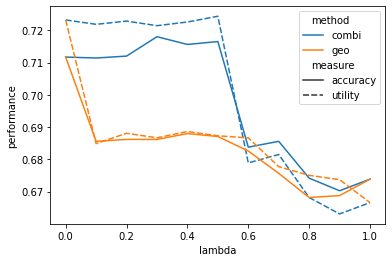

In [14]:
#construct performance graph
#Construct a graph to compare performance and repair strength lambda
performance_df = pd.DataFrame({
    'method':['geo' if i%2 else 'combi' for i in range(22)],
    'lambda':[0,0,0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9,1.0,1.0],
    'accuracy':model_accuracies,
    'utility':utilities,
    'zemel_fairness':zemel_fairnesses,
    'disparate_impact':disparate_impact_scores
})
performance_df_1 = pd.DataFrame({
    'method':['geo' if i%2 else 'combi' for i in range(22)],
    'lambda':[0,0,0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9,1.0,1.0],
    'performance':model_accuracies,
    'zemel_fairness':zemel_fairnesses,
    'disparate_impact':disparate_impact_scores,
    'measure':['accuracy' for i in range(22)]
})
performance_df_2 = pd.DataFrame({
    'method':['geo' if i%2 else 'combi' for i in range(22)],
    'lambda':[0,0,0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9,1.0,1.0],
    'performance':utilities,
    'zemel_fairness':zemel_fairnesses,
    'disparate_impact':disparate_impact_scores,
    'measure':['utility' for i in range(22)]
})
performance_df_1=pd.concat([performance_df_1,performance_df_2])
print(performance_df_1)
sns.lineplot(data=performance_df_1,x='lambda',y='performance',hue='method',style='measure')


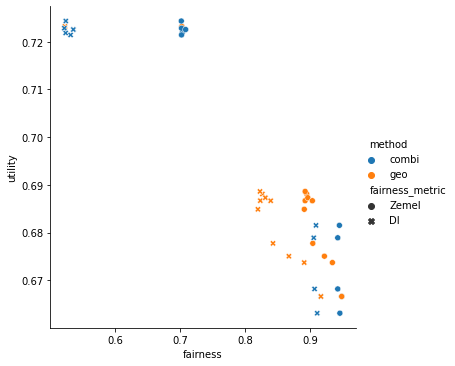

In [15]:
#Construct a graph to compare utility and fairness
performance_df_1 = pd.DataFrame({
    'method':['geo' if i%2 else 'combi' for i in range(22)],
    'lambda':[0,0,0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9,1.0,1.0],
    'accuracy':model_accuracies,
    'utility':utilities,
    'fairness':zemel_fairnesses,
    'fairness_metric':['Zemel' for i in range(22)]
})
performance_df_2 = pd.DataFrame({
    'method':['geo' if i%2 else 'combi' for i in range(22)],
    'lambda':[0,0,0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9,1.0,1.0],
    'accuracy':model_accuracies,
    'utility':utilities,
    'fairness':disparate_impact_scores,
    'fairness_metric':['DI' for i in range(22)]
})
performance_df_1=pd.concat([performance_df_1,performance_df_2])
sns.relplot(data=performance_df_1,x='fairness',y='utility',hue='method',style='fairness_metric')